**Objective**

Fresh Analytics, a data analytics company, aims to comprehend and predict the demand
for various items across restaurants. The primary goal of the project is to determine the
sales of items across different restaurants over the years.

**Problem statement**

In ever-changing competitive market conditions, there is a need to make correct
decisions and plans for future events related to business like sales, production, and
many more. The effectiveness of a decision taken by business managers is influenced by
the accuracy of the models used. Demand is the most important aspect of a business's
ability to achieve its objectives. Many decisions in business depend on demand, like
production, sales, and staff requirements. Forecasting is necessary for business at both
international and domestic levels.

**Data Dictionary**

***Resturant Dataset***

<table>
<thead>
<th>Variables</th><th>Description</th>
</thead>
<tr>
<th>id</th><td>Unique identification of the restaurant or store</td></tr>
<tr>
<th>name</th><td>Name of the restaurant</td>
</tr>
</table>

***Items Dataset***

<table>
<thead>
<th>Variables</th><th>Description</th>
</thead>
<tr><th>id</th><td>Unique identification of the item</td></tr>
<tr><th>store_id</th><td>Unique identification of the store</td></tr>
<tr><th>name</th><td>Name of the item</td></tr>
<tr><th>kcal</th><td>A measure of energy nutrients (calories) in the item</td></tr>
<tr><th>cost</th><td>The unit price of the item bought</td></tr>
</table>

***Sales Dataset***


<table>
<thead>
<th>Variables</th><th>Description</th>
</thead>
<tr><th>date</th> <td>Date of purchase</td></tr>
<tr><th>item Name</th><td>Name of the item bought</td></tr>
<tr><th>Price Unit</th><td>Price of the item</td></tr>
<tr><th>item_count</th><td>Total count of the items bought on that day</td.</tr>
</table>


In [2]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [4]:
# Load the Items dataset
items_dataframe=pd.read_csv("items.csv")

In [5]:
# Load the Resturants dataset
resturants_dataframe=pd.read_csv("resturants.csv")

In [6]:
# Load the Sales dataset
sales_dataframe=pd.read_csv("sales.csv")

**Let's view the head and tail of Resturant dataset**

In [7]:
resturants_dataframe.head()

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe


In [8]:
resturants_dataframe.tail()

,id,name
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe
5,6,Surfs Up


**Let's check the shape of the resturant dataset**

In [9]:
resturants_dataframe.shape

(6, 2)

**Observation:** There are 6 rows and 2 columns and there are no summary rows in the resturant dataset.

**Let's rename the feature ID to STORE_ID and NAME to STORE_NAME**

In [10]:
resturants_dataframe = resturants_dataframe.rename(columns={'id': 'store_id', 'name': 'name'})

In [11]:
resturants_dataframe=resturants_dataframe.rename(columns={'name':'store_name'})

In [12]:
# display the head to confirm that the rename has actually happened
resturants_dataframe.head(6)

,store_id,store_name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe
5,6,Surfs Up


**Let us check the info of resturants dataframe**

In [13]:
resturants_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    6 non-null      int64 
 1   store_name  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [14]:
resturants_dataframe.isnull().sum()

,0
store_id,0
store_name,0


**Observation:** There are no missing values in the resturant's dataframe as there are all six values in  both the columns of the dataset.

**Let us check duplicate values in resturant dataframe**

In [15]:
duplicateRows = resturants_dataframe[resturants_dataframe.duplicated(keep='first')]
duplicateRows.head()

,store_id,store_name


**Observation:** There are no duplicate rows in resturant dataframe.

**Let's view the head and tail of the Items dataset**

In [16]:
items_dataframe.head()

,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07


In [17]:
items_dataframe.tail()

,id,store_id,name,kcal,cost
95,96,5,Blue Ribbon Fish with Bread Lunch,708,21.93
96,97,4,Original Fruity Cod with Bread and Vegetables ...,744,28.65
97,98,2,Original Sweet Milky Soft Drink,579,5.00
98,99,4,Frozen Tomato Soft Drink,423,5.32
99,100,2,Awesome Vodka Cocktail,223,2.48


In [18]:
items_dataframe.shape

(100, 5)

**Observation:** There are 100 rows and 5 columns and also there are no summary rows in the Items dataset.

**Let us rename NAME column to ITEM_NAME and ID to ITEM_ID**

In [19]:
items_dataframe=items_dataframe.rename(columns={'name':'item_name'})

In [20]:
items_dataframe=items_dataframe.rename(columns={'id':'item_id'})

In [21]:
items_dataframe.head()

,item_id,store_id,item_name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07


**Let's view the info of items_dataframe**

In [22]:
items_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    100 non-null    int64  
 1   store_id   100 non-null    int64  
 2   item_name  100 non-null    object 
 3   kcal       100 non-null    int64  
 4   cost       100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


In [23]:
items_dataframe.isnull().sum()

,0
item_id,0
store_id,0
item_name,0
kcal,0
cost,0


**Observation:** There are no missing values in the items dataset as there are 100 values in each column of the dataframe. Also all the columns have numerical values except the item name column.

**Let us check duplicate rows in items dataframe.**

In [24]:
duplicateRows = items_dataframe[items_dataframe.duplicated(keep='first')]
duplicateRows.head()

,item_id,store_id,item_name,kcal,cost


**Observation:** There are no duplicate rows in items dataframe.

**Let's describe the items dataset**

In [25]:
items_dataframe.describe()

,item_id,store_id,kcal,cost
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.520000,536.730000,11.763700
std,29.011492,1.708446,202.212852,8.991254
min,1.000000,1.000000,78.000000,1.390000
25%,25.750000,2.000000,406.250000,5.280000
50%,50.500000,4.000000,572.500000,7.625000
75%,75.250000,5.000000,638.250000,18.790000
max,100.000000,6.000000,1023.000000,53.980000


**Observation:** <br/>
(1) The maximum Kilo Calories that can be obtained from food items sold in these resturants is 1023 and minimum is 78. The average is approx. 537. <br/>
(2) The cheapest food item costs 1.39 dollars and the costliest food item is of approx. 54 dollars. The average is 11.76

**Let's view the head and tail of Sales dataset**

In [26]:
sales_dataframe.head()

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0
2,2019-01-01,12,4.87,7.0
3,2019-01-01,13,4.18,12.0
4,2019-01-01,16,3.21,136.0


In [27]:
sales_dataframe.tail()

,date,item_id,price,item_count
109595,2021-12-31,96,21.93,0.0
109596,2021-12-31,97,28.65,0.0
109597,2021-12-31,98,5.00,0.0
109598,2021-12-31,99,5.32,0.0
109599,2021-12-31,100,2.48,0.0


In [28]:
sales_dataframe.shape

(109600, 4)

**Observation:** The are 109600 rows and 4 columns in the Sales dataset and also there are no summmary rows.

**Let's view the basic info of the sales dataset**

In [29]:
sales_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB


In [30]:
sales_dataframe.isnull().sum()

,0
date,0
item_id,0
price,0
item_count,0


**Observation:** There are no missing values in any column of the sales dataset as there are 109600 values in each column. Also there are no categorical columns in the dataset.

**Let us check duplicate rows in sales dataframe.**

In [31]:
duplicateRows = items_dataframe[items_dataframe.duplicated(keep='first')]
duplicateRows.head()

,item_id,store_id,item_name,kcal,cost


**Observation:** There are no duplicate rows in the sales dataframe.

**Let's now describe the sales dataset**

In [32]:
sales_dataframe.describe()

,item_id,price,item_count
count,109600.000000,109600.000000,109600.000000
mean,50.500000,11.763700,6.339297
std,28.866202,8.946225,30.003728
min,1.000000,1.390000,0.000000
25%,25.750000,5.280000,0.000000
50%,50.500000,7.625000,0.000000
75%,75.250000,18.790000,0.000000
max,100.000000,53.980000,570.000000


**Observation:** The maximum count of item sold is 570 and the minimum is 0 in the given dataset. the average is approx. 6.

**Let us merge the Resturants dataset and Items dataset**

In [33]:
items_resturants_df=pd.merge(items_dataframe,resturants_dataframe,on='store_id',how='inner')

In [34]:
items_resturants_df.shape

(100, 6)

In [35]:
items_resturants_df.head()

,item_id,store_id,item_name,kcal,cost,store_name
0,1,4,Chocolate Cake,554,6.71,Fou Cher
1,2,4,Breaded Fish with Vegetables Meal,772,15.09,Fou Cher
2,3,1,Sweet Fruity Cake,931,29.22,Bob's Diner
3,4,1,Amazing Steak Dinner with Rolls,763,26.42,Bob's Diner
4,5,5,Milk Cake,583,6.07,Corner Cafe


**Let us merge the Sales dataset with items_resturants dataset**

In [36]:
sales_items_resturants_df=pd.merge(sales_dataframe,items_resturants_df,on='item_id',how='inner')

**Lets check the head and tail of the resultant dataset**

In [37]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,cost,store_name
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,29.22,Bob's Diner
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,26.42,Bob's Diner
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,4.87,Bob's Diner
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,4.18,Bob's Diner
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,3.21,Bob's Diner


In [38]:
sales_items_resturants_df.tail()

,date,item_id,price,item_count,store_id,item_name,kcal,cost,store_name
109595,2021-12-31,96,21.93,0.0,5,Blue Ribbon Fish with Bread Lunch,708,21.93,Corner Cafe
109596,2021-12-31,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744,28.65,Fou Cher
109597,2021-12-31,98,5.00,0.0,2,Original Sweet Milky Soft Drink,579,5.00,Beachfront Bar
109598,2021-12-31,99,5.32,0.0,4,Frozen Tomato Soft Drink,423,5.32,Fou Cher
109599,2021-12-31,100,2.48,0.0,2,Awesome Vodka Cocktail,223,2.48,Beachfront Bar


In [39]:
sales_items_resturants_df.shape

(109600, 9)

**Feature Engineering**

***Let's create a new column sale_amt***

In [40]:
sales_items_resturants_df['total_sales']=sales_items_resturants_df.price*sales_items_resturants_df.item_count

In [41]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,cost,store_name,total_sales
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,29.22,Bob's Diner,58.44
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,26.42,Bob's Diner,581.24
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,4.87,Bob's Diner,34.09
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,4.18,Bob's Diner,50.16
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,3.21,Bob's Diner,436.56


***Let's check the values in cost and price columns***

In [42]:
sales_items_resturants_df[sales_items_resturants_df['cost']!=sales_items_resturants_df['price']]

,date,item_id,price,item_count,store_id,item_name,kcal,cost,store_name,total_sales


**Observation:** All the values are same in the cost and price columns. So we can drop cost column.

In [43]:
sales_items_resturants_df.drop('cost',axis=1,inplace=True)

In [44]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56


In [45]:
sales_items_resturants_df.shape

(109600, 9)

In [46]:
sales_items_resturants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         109600 non-null  object 
 1   item_id      109600 non-null  int64  
 2   price        109600 non-null  float64
 3   item_count   109600 non-null  float64
 4   store_id     109600 non-null  int64  
 5   item_name    109600 non-null  object 
 6   kcal         109600 non-null  int64  
 7   store_name   109600 non-null  object 
 8   total_sales  109600 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.5+ MB


**Observation:** Date is of object type. let us convert it to datetime type.

In [47]:
sales_items_resturants_df['date']=pd.to_datetime(sales_items_resturants_df['date'])

In [48]:
sales_items_resturants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         109600 non-null  datetime64[ns]
 1   item_id      109600 non-null  int64         
 2   price        109600 non-null  float64       
 3   item_count   109600 non-null  float64       
 4   store_id     109600 non-null  int64         
 5   item_name    109600 non-null  object        
 6   kcal         109600 non-null  int64         
 7   store_name   109600 non-null  object        
 8   total_sales  109600 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 7.5+ MB


In [49]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56


**Let us convert the item_name to categorical type**

In [50]:
sales_items_resturants_df['item_name']=sales_items_resturants_df['item_name'].astype('category')

In [51]:
sales_items_resturants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         109600 non-null  datetime64[ns]
 1   item_id      109600 non-null  int64         
 2   price        109600 non-null  float64       
 3   item_count   109600 non-null  float64       
 4   store_id     109600 non-null  int64         
 5   item_name    109600 non-null  category      
 6   kcal         109600 non-null  int64         
 7   store_name   109600 non-null  object        
 8   total_sales  109600 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 6.8+ MB


In [52]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56


**Let us create a new column day_of_week**

In [53]:
import datetime

In [54]:
sales_items_resturants_df['day_in_month']=sales_items_resturants_df['date'].dt.day

In [55]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44,1
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24,1
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09,1
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16,1
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56,1


In [56]:
sales_items_resturants_df.tail()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month
109595,2021-12-31,96,21.93,0.0,5,Blue Ribbon Fish with Bread Lunch,708,Corner Cafe,0.0,31
109596,2021-12-31,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744,Fou Cher,0.0,31
109597,2021-12-31,98,5.00,0.0,2,Original Sweet Milky Soft Drink,579,Beachfront Bar,0.0,31
109598,2021-12-31,99,5.32,0.0,4,Frozen Tomato Soft Drink,423,Fou Cher,0.0,31
109599,2021-12-31,100,2.48,0.0,2,Awesome Vodka Cocktail,223,Beachfront Bar,0.0,31


In [57]:
sales_items_resturants_df['weekday']=sales_items_resturants_df['date'].dt.day_name()

In [58]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44,1,Tuesday
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24,1,Tuesday
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09,1,Tuesday
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16,1,Tuesday
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56,1,Tuesday


**Let us create another column for month of sale**

In [59]:
sales_items_resturants_df['month']=sales_items_resturants_df['date'].dt.month_name()

In [60]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44,1,Tuesday,January
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24,1,Tuesday,January
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09,1,Tuesday,January
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16,1,Tuesday,January
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56,1,Tuesday,January


**Let us create another column to capture the Quarter of sale**

In [61]:
sales_items_resturants_df['quarter']=sales_items_resturants_df['date'].dt.quarter

In [62]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44,1,Tuesday,January,1
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24,1,Tuesday,January,1
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09,1,Tuesday,January,1
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16,1,Tuesday,January,1
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56,1,Tuesday,January,1


**Let us create a new column sale_year from date**

In [63]:
sales_items_resturants_df['sale_year']=sales_items_resturants_df['date'].dt.year

In [64]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44,1,Tuesday,January,1,2019
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24,1,Tuesday,January,1,2019
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09,1,Tuesday,January,1,2019
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16,1,Tuesday,January,1,2019
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56,1,Tuesday,January,1,2019


**Let us analyze the sales patterns on different weekdays**

In [65]:
sales_items_resturants_df.groupby('weekday')['total_sales'].sum().sort_values(ascending=False)

,total_sales
weekday,
Friday,1257338.16
Saturday,1250574.32
Thursday,1073534.52
Wednesday,812613.31
Tuesday,734598.46
Monday,644799.97
Sunday,630279.71


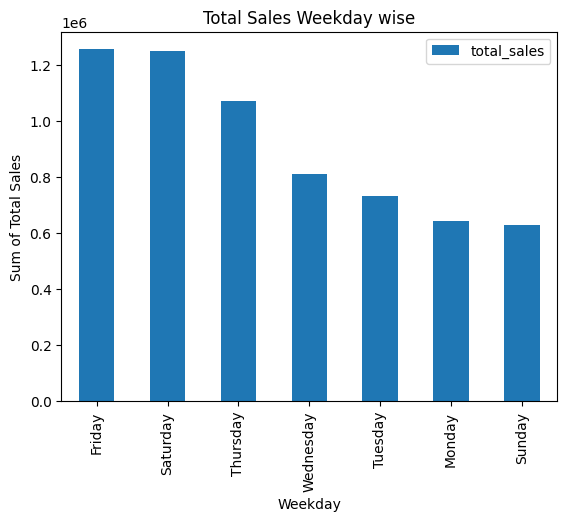

In [66]:
sales_items_resturants_df.groupby('weekday')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',legend=True)
plt.xlabel('Weekday')
plt.ylabel('Sum of Total Sales')
plt.title('Total Sales Weekday wise')
plt.show()

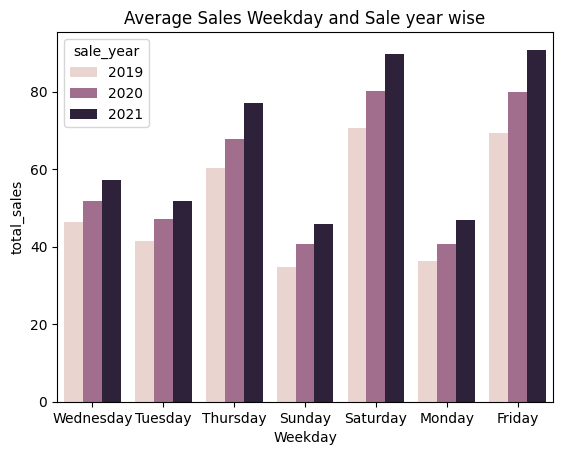

In [495]:
grouped_data = sales_items_resturants_df.groupby(['weekday','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','weekday'],ascending=False)
sns.barplot(x='weekday', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Weekday')
plt.title('Average Sales Weekday and Sale year wise')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


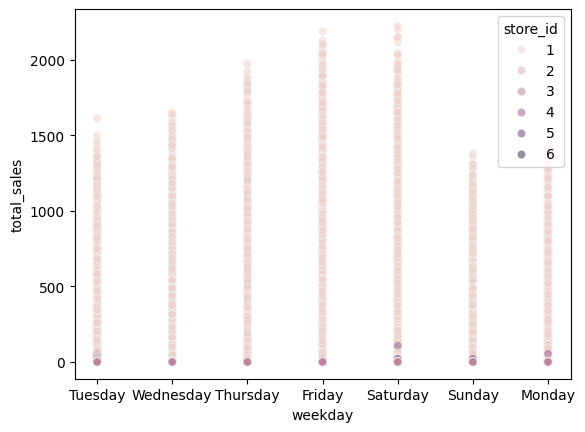

<Figure size 1000x500 with 0 Axes>

In [496]:
sns.scatterplot(x='weekday',y='total_sales',data=sales_items_resturants_df,hue='store_id',alpha=0.5)
plt.figure(figsize=(10,5))
plt.show()

**Observation:** <ul>
<li>The highest sale is on Friday and saturday. Friday being the last working weekday and saturday is the begining of the weekend. So people seem to buy eatables for weekends, specially for sunday and have dinner in resturant on friday and saturdays. That seems to be the probable reason for high sales on fridays and saturdays.</li>
<li>People seem to spend sunday at home. That may be the probable reason for lowest sales on sunday.</li>
<li>Monday being the first working day, the emphasis being on work, outing is minimal.</li>
<li>Tuesday , wednessday and thursday see a gradually hike in sales probably due to work fatigue as the week progresses. People don't like to cook at home, rather dine at resturants.</li>
</ul>

**Let us analyse the sales pattern in different months**

In [497]:
sales_items_resturants_df.groupby('month')['total_sales'].sum().sort_values(ascending=False)

,total_sales
month,
July,706038.79
June,691116.06
May,666063.17
August,647024.97
April,571458.39
September,548927.39
October,501292.21
March,498218.89
November,412535.86


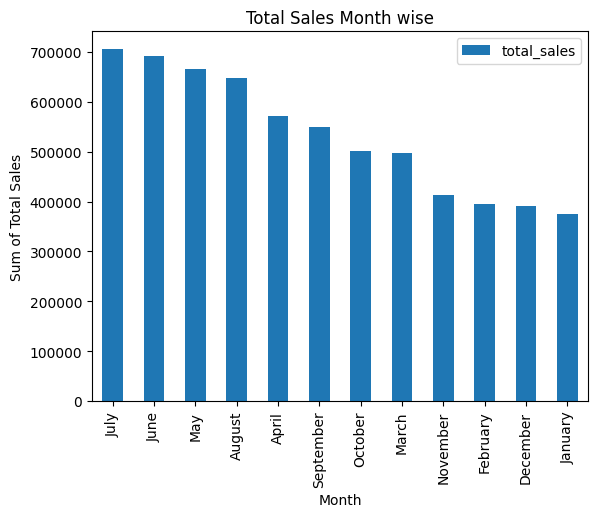

In [498]:
sales_items_resturants_df.groupby('month')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',legend=True)
plt.xlabel('Month')
plt.ylabel('Sum of Total Sales')
plt.title('Total Sales Month wise')
plt.show()

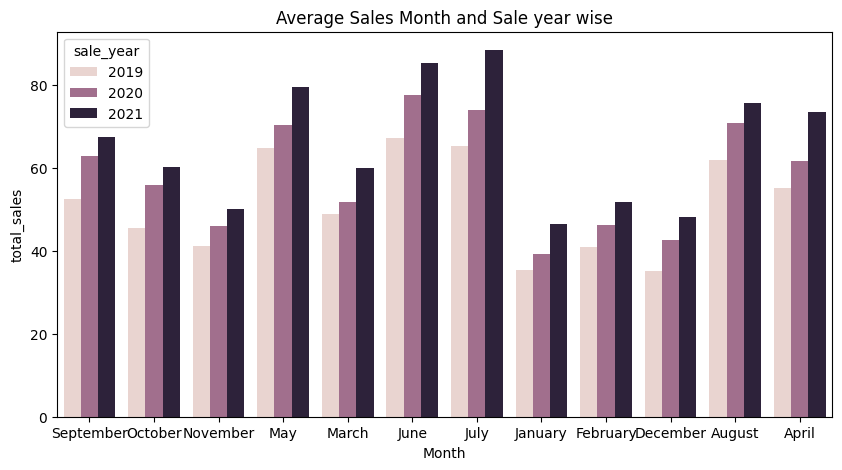

In [499]:
grouped_data = sales_items_resturants_df.groupby(['month','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','month'],ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Month')
plt.title('Average Sales Month and Sale year wise')
plt.show()

**Observation:**


*   December january being festive months show lowest sales. The people seem to spend their budget in other items instead of spending it in resturants.
*   In winters months the sales is comparatively lower. People seem to stay home during winters.
*   The sales are high during summers.
*   Highest sales are recorded in may,jun, jul months. This is probably due to end of acedemic session and the families tend to go out and party.





**Let us analyze the sales patterns in different quarters.**

**Total sales quarter wise**

In [500]:
sales_items_resturants_df.groupby('quarter')['total_sales'].sum().sort_values(ascending=False)

,total_sales
quarter,
2,1928637.62
3,1901991.15
4,1304585.39
1,1268524.29


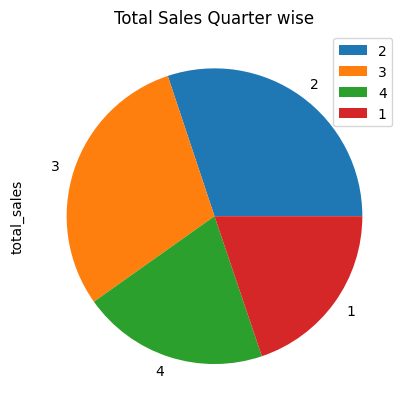

In [514]:
sales_items_resturants_df.groupby('quarter')['total_sales'].sum().sort_values(ascending=False).plot(kind='pie',legend=True)
plt.title('Total Sales Quarter wise')
plt.show()

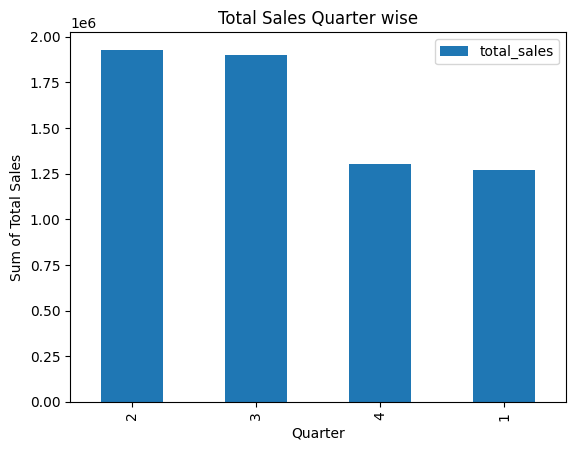

In [501]:
sales_items_resturants_df.groupby('quarter')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',legend=True)
plt.xlabel('Quarter')
plt.ylabel('Sum of Total Sales')
plt.title('Total Sales Quarter wise')
plt.show()

**Average Sales Quarter wise**

In [502]:
sales_items_resturants_df.groupby('quarter')['total_sales'].mean().sort_values(ascending=False)

,total_sales
quarter,
2,70.646067
3,68.912723
4,47.267587
1,46.809014


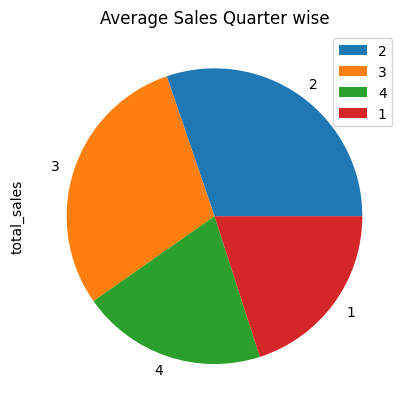

In [515]:
sales_items_resturants_df.groupby('quarter')['total_sales'].mean().sort_values(ascending=False).plot(kind='pie',legend=True)
plt.title('Average Sales Quarter wise')
plt.show()

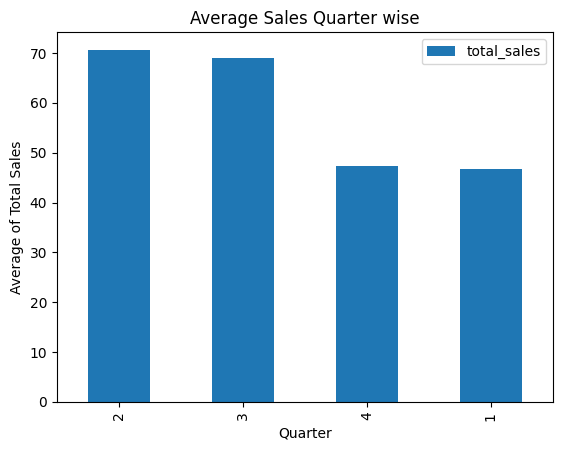

In [503]:
sales_items_resturants_df.groupby('quarter')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar',legend=True)
plt.xlabel('Quarter')
plt.ylabel('Average of Total Sales')
plt.title('Average Sales Quarter wise')
plt.show()

In [504]:
sales_items_resturants_df.head(3)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44,1,Tuesday,January,1,2019
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24,1,Tuesday,January,1,2019
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09,1,Tuesday,January,1,2019


In [505]:
sales_items_resturants_df['sale_year'].unique()

array([2019, 2020, 2021], dtype=int32)

**Let us group total_sales by differnt quarters of different sale years**

In [506]:
sales_items_resturants_df.groupby(['quarter','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','quarter'],ascending=False)

,quarter,sale_year,total_sales
11,4,2021,52.922620
8,3,2021,77.344928
5,2,2021,79.539702
2,1,2021,52.891403
10,4,2020,48.249516
7,3,2020,69.329654
4,2,2020,69.880810
1,1,2020,45.718356
9,4,2019,40.630624
6,3,2019,60.063586


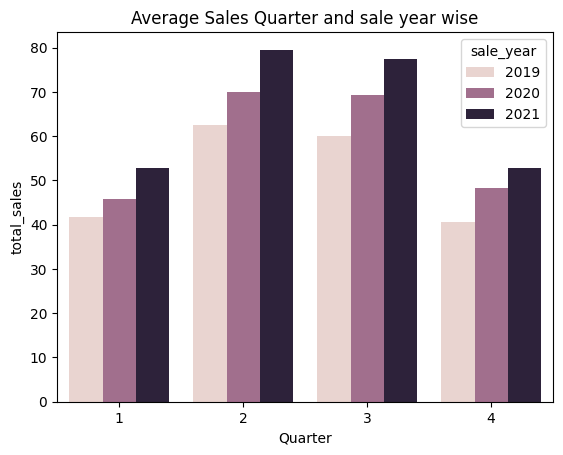

In [507]:
grouped_data = sales_items_resturants_df.groupby(['quarter','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','quarter'],ascending=False)
sns.barplot(x='quarter', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Quarter')
plt.title('Average Sales Quarter and sale year wise')
plt.show()

**Observation:**



*   Sales has increased in every year in corresponding quarter.
*   The pattern of increase and decrease in sales is consistant across the quarters over the years.


*   Last quarter(Q4) and first quarter(Q1) saw lowest sales. This might be probably due to december being festive month, people tend to spend on house mantaince, home decoration, clothes etc. House maintenance activities start in the begining of the last quarter and culminate before Christmas. So the household budget is focused on these activites rather than on dinning in restaurants.
*   The first quarter also shows low sales. This probably is due to the fact that the households recover from high house maintenace expenses in next two to three months.


*   The highest sales are recorded in the second and the third quarters.
*   This probably attributes to the fact that at these times the weather is relatively pleasant.


*   The acedamic break also falls in this period. People prefer to go out for dinner with family.







In [508]:
resturants_dataframe.head()

,store_id,store_name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe


**Let us check the sale pattern of Restaurant Bob's Diner**



***Sale pattern over weekdays for Restaurant Bob's Diner***

In [509]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==1].groupby('weekday')['total_sales'].sum().sort_values(ascending=False)

,total_sales
weekday,
Friday,1247393.16
Saturday,1241421.51
Thursday,1063813.76
Wednesday,802967.98
Tuesday,725443.80
Monday,635165.98
Sunday,621069.50


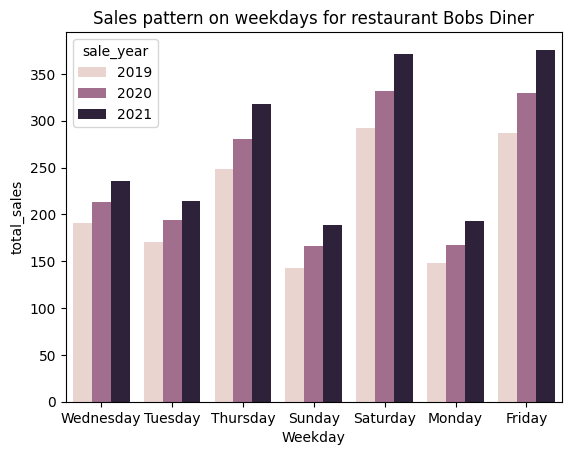

In [510]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==1].groupby(['weekday','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['weekday'],ascending=False)
sns.barplot(x='weekday', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Weekday')
plt.title('Sales pattern on weekdays for restaurant Bobs Diner')
plt.show()

**Observation:**

*   There has been a consitent increase in sales every year for each corresponding day of the week. **So, Bobs Diner is showing a consistent growth pattern over the years.**
*   Thursday, Friday and Saturday ie; days close to weekends have the highest sales over the years.


*   Sunday has the lowest sale over the years. This probably is due to the fact that people like to party on friday and saturday and complete their house corous on sunday.
*   The sale gradually picks up from Monday to Thursday and then gradually peaking on friday and satudays.





***Sale pattern over months for Restaurant Bob's Diner***

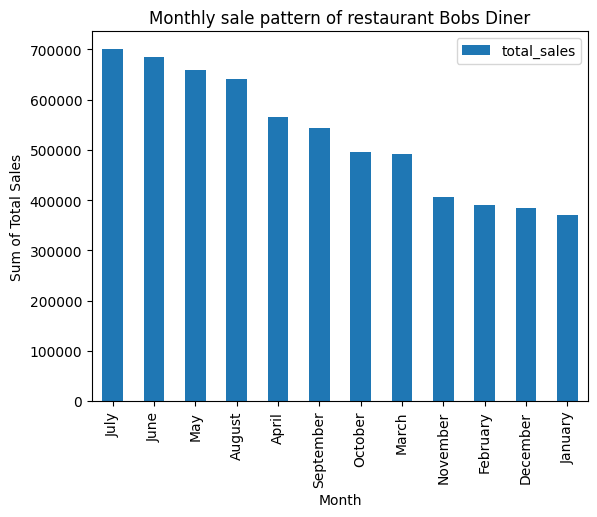

In [516]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==1].groupby('month')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',legend=True)
plt.xlabel('Month')
plt.ylabel('Sum of Total Sales')
plt.title('Monthly sale pattern of restaurant Bobs Diner')
plt.show()

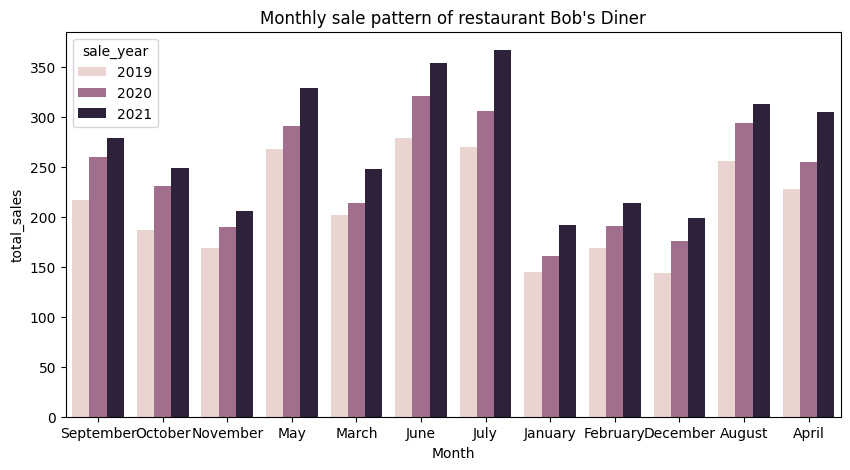

In [517]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==1].groupby(['month','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','month'],ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Month')
plt.title("Monthly sale pattern of restaurant Bob's Diner")
plt.show()

**Observations:**


1.   The monthly sale pattern also shows a consistent growth in corresponding months over the years.
2.   The sale pattern show lower sales from month before and after two months after the festive month of december. This probably is due to the fact that people spend on other items during these days rather than dining out.


3.   The highest sales are during summers and autum. The cold months see a decreasing trend in sales as people like to stay more at home during harsh cold days.






***Sale pattern of Bob's Diner over the years***

In [518]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==1].groupby('sale_year')['total_sales'].sum().sort_values(ascending=False)

,total_sales
sale_year,
2021,2375460.29
2020,2112331.91
2019,1849483.49


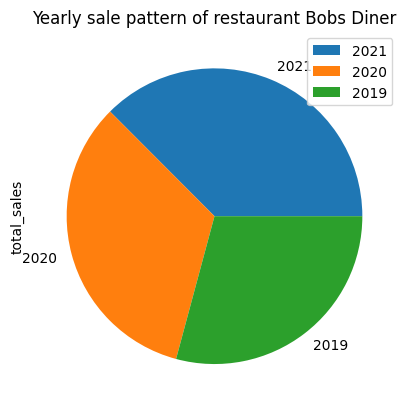

In [521]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==1].groupby('sale_year')['total_sales'].sum().sort_values(ascending=False).plot(kind='pie',legend=True)
plt.title('Yearly sale pattern of restaurant Bobs Diner')
plt.show()

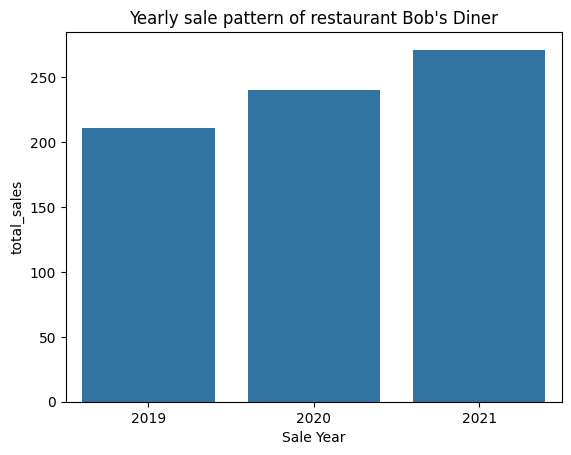

In [519]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==1].groupby(by=['sale_year'])['total_sales'].mean()
grouped_data_df=pd.DataFrame(grouped_data)
type(grouped_data_df)
sns.barplot(x='sale_year', y='total_sales', data=grouped_data_df)
plt.xlabel('Sale Year')
plt.title("Yearly sale pattern of restaurant Bob's Diner")
plt.show()

**Observations:**


*   The yearly sale pattern confirms the fact the Bob's Diner sales have increased over the years. There has been a consistent growth in sales of Bob's Diner restaurant.



**Let us check the sale pattern of Restaurant Beachfront Bar**

***Sale pattern over weekdays for Restaurant Beachfront Bar***

In [522]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==2].groupby('weekday')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by=['sum'],ascending=False)

,sum,mean,max,min
weekday,,,,
Wednesday,613.29,0.651051,11.64,0.0
Tuesday,548.72,0.582505,11.64,0.0
Monday,544.78,0.582030,11.64,0.0
Saturday,538.93,0.575780,11.64,0.0
Sunday,523.11,0.558878,8.73,0.0
Thursday,518.58,0.550510,14.55,0.0
Friday,508.79,0.540117,11.64,0.0


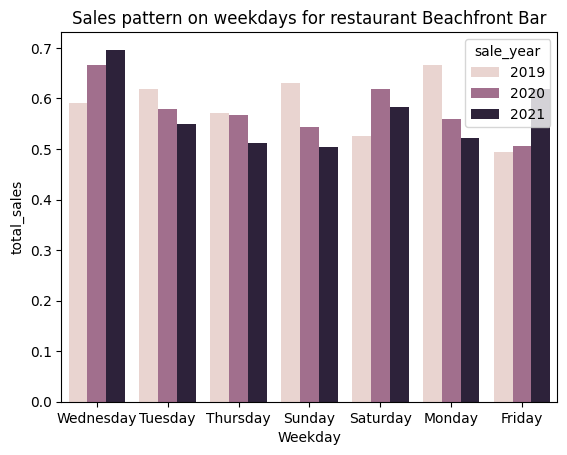

In [523]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==2].groupby(['weekday','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','weekday'],ascending=False)
sns.barplot(x='weekday', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Weekday')
plt.title('Sales pattern on weekdays for restaurant Beachfront Bar')
plt.show()

**Observatios:**


*   The day wise weekly sale pattern of Beachfront Bar shows a decrease in the sales over the years except for Wednesday and Friday where there has been postive growth in sales.
*   weekends sales are not very promising.



***Sale pattern over months for Restaurant Beachfront Bar***

In [524]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==2].groupby('month')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by=['sum'],ascending=False)

,sum,mean,max,min
month,,,,
December,390.13,0.699158,11.64,0.0
March,340.23,0.609731,8.73,0.0
May,332.64,0.596129,8.73,0.0
February,318.10,0.623725,11.64,0.0
April,317.58,0.588111,11.64,0.0
January,315.55,0.565502,11.64,0.0
November,310.17,0.574389,8.73,0.0
September,305.71,0.566130,11.64,0.0
July,299.07,0.535968,11.64,0.0


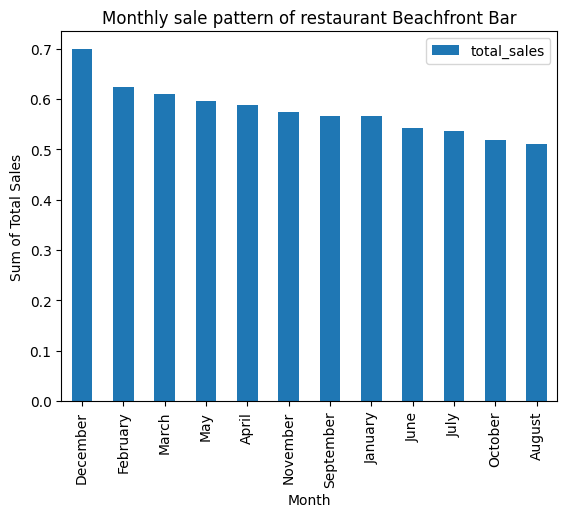

In [525]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==2].groupby('month')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar',legend=True)
plt.xlabel('Month')
plt.ylabel('Sum of Total Sales')
plt.title('Monthly sale pattern of restaurant Beachfront Bar')
plt.show()

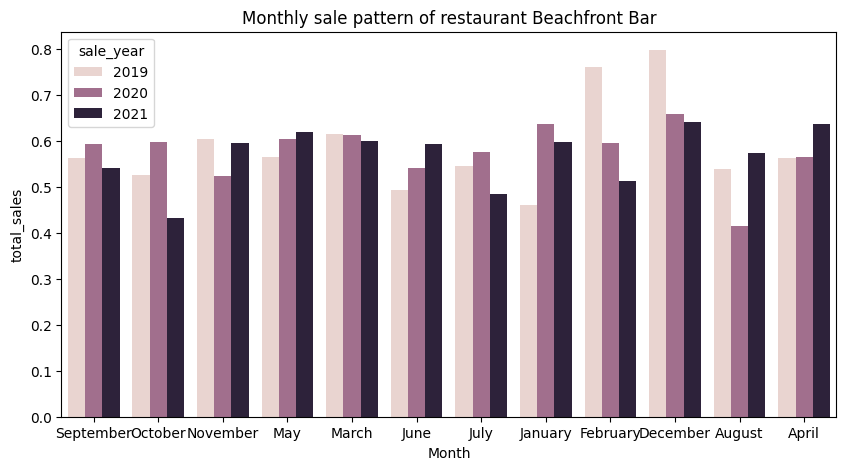

In [526]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==2].groupby(['month','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','month'],ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Month')
plt.title('Monthly sale pattern of restaurant Beachfront Bar')
plt.show()

**Observations:**


*   December month is showing highest sales over the years for Beachfront Bar restaurant.  
*   Most of the months show a decline in sales except April, May and June.



***Sale pattern over the years of Beachfront Bar***

In [527]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==2].groupby('sale_year')['total_sales'].agg(['sum', 'mean', 'max','min'])

,sum,mean,max,min
sale_year,,,,
2019,1281.85,0.585320,11.64,0.0
2020,1267.21,0.577054,11.64,0.0
2021,1247.14,0.569470,14.55,0.0


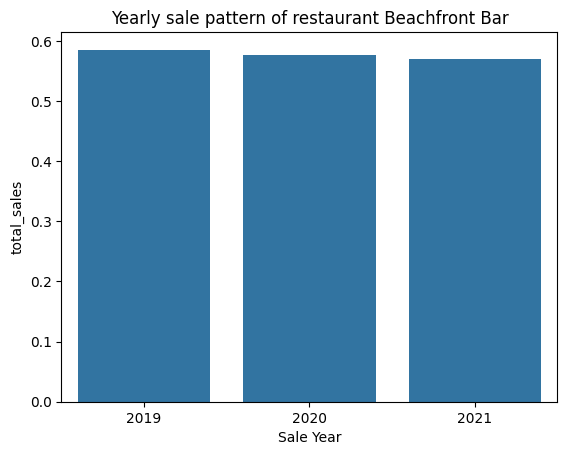

In [528]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==2].groupby(by=['sale_year'])['total_sales'].mean()
grouped_data_df=pd.DataFrame(grouped_data)
type(grouped_data_df)
sns.barplot(x='sale_year', y='total_sales', data=grouped_data_df)
plt.xlabel('Sale Year')
plt.title('Yearly sale pattern of restaurant Beachfront Bar')
plt.show()

**Observations:**


*   The yearly sale pattern of Beachfront Bar shows slight decline in the sale figure over the years.



**Lets check the sale pattern of Resturant Sweet Shack**

***Let's check the sales pattern on weekdays for restaurant Sweet Shack***

In [529]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==3].groupby('weekday')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by=['sum'],ascending=False)

,sum,mean,max,min
weekday,,,,
Tuesday,405.07,0.322508,6.95,0.0
Saturday,400.23,0.320697,6.89,0.0
Sunday,371.49,0.297668,8.34,0.0
Monday,363.86,0.291554,6.95,0.0
Thursday,353.10,0.281131,8.34,0.0
Friday,348.50,0.277468,6.95,0.0
Wednesday,336.02,0.267532,6.89,0.0


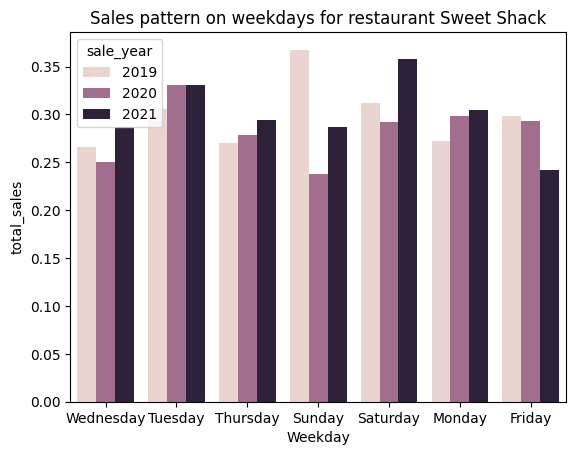

In [530]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==3].groupby(['weekday','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','weekday'],ascending=False)
sns.barplot(x='weekday', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Weekday')
plt.title('Sales pattern on weekdays for restaurant Sweet Shack')
plt.show()

**Observation:**


*   Most of the day of the weeks show improvement over the previos year except for friday sales, where ther is a decline in sales.
*   Highest sales are recorded on Tuesday, saturday and sunday.



***Let's check the monthly sale pattern of resturant Sweet Shack***

In [531]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==3].groupby('month')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by=['sum'],ascending=False)

,sum,mean,max,min
month,,,,
January,254.40,0.341935,6.95,0.0
May,234.47,0.315148,6.95,0.0
June,226.73,0.314903,8.34,0.0
October,224.80,0.302151,5.68,0.0
August,219.77,0.295390,6.89,0.0
March,215.91,0.290202,6.95,0.0
September,214.06,0.297306,8.34,0.0
December,209.44,0.281505,5.56,0.0
July,205.87,0.276707,6.95,0.0


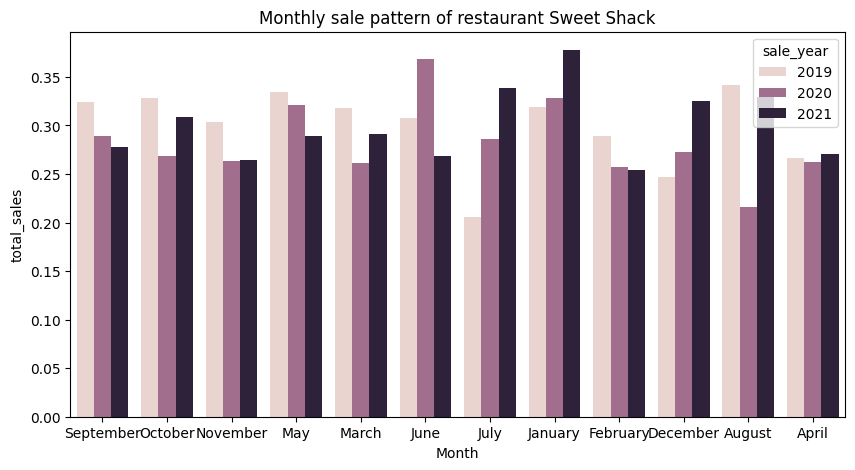

In [532]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==3].groupby(['month','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','month'],ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Month')
plt.title('Monthly sale pattern of restaurant Sweet Shack')
plt.show()

**Observation:**


*   Highest sales were recorded in the month of Jan, May and Jun
*   Lowest sales were in Feb and April



***Let's check the yearly sales pattern of Sweet Shack***

In [533]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==3].groupby('sale_year')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by='sum',ascending=False)

,sum,mean,max,min
sale_year,,,,
2021,877.03,0.300353,6.95,0.0
2019,872.59,0.298832,8.34,0.0
2020,828.65,0.283009,8.34,0.0


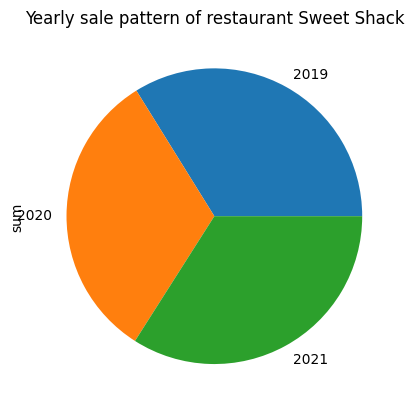

In [537]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==3].groupby('sale_year')['total_sales'].agg(['sum']).plot(kind='pie',legend=False,subplots=True)
plt.title('Yearly sale pattern of restaurant Sweet Shack')
plt.show()

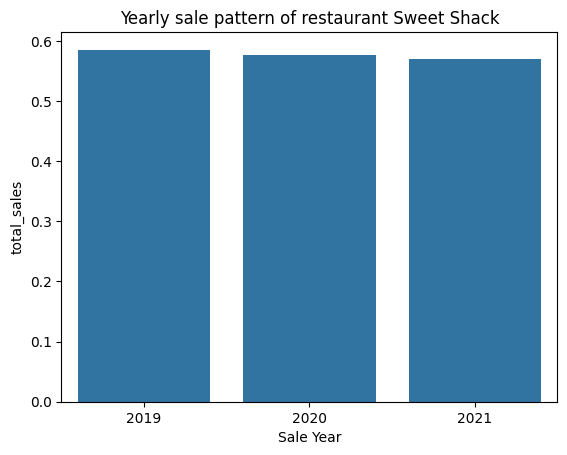

In [538]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==2].groupby(by=['sale_year'])['total_sales'].mean()
grouped_data_df=pd.DataFrame(grouped_data)
type(grouped_data_df)
sns.barplot(x='sale_year', y='total_sales', data=grouped_data_df)
plt.xlabel('Sale Year')
plt.title('Yearly sale pattern of restaurant Sweet Shack')
plt.show()

**Observation:**


*   There has been a very slugish positive growth in the sales of restaurant Sweet Shack over the years.

*   However, there was a slight slump in sales figures in 2020.





**Let's Analyze the sale patterns of resturant Fou Cher**

***Let's check the sale pattern of restaurant Fou Cher across weekdays***

In [539]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==4].groupby('weekday')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by='sum',ascending=False)

,sum,mean,max,min
weekday,,,,
Wednesday,4342.13,0.987746,107.96,0.0
Thursday,4272.16,0.971829,107.96,0.0
Friday,4227.35,0.961636,107.96,0.0
Monday,3927.47,0.899146,107.96,0.0
Saturday,3753.69,0.859361,107.96,0.0
Tuesday,3742.68,0.851383,107.96,0.0
Sunday,3619.89,0.828729,107.96,0.0


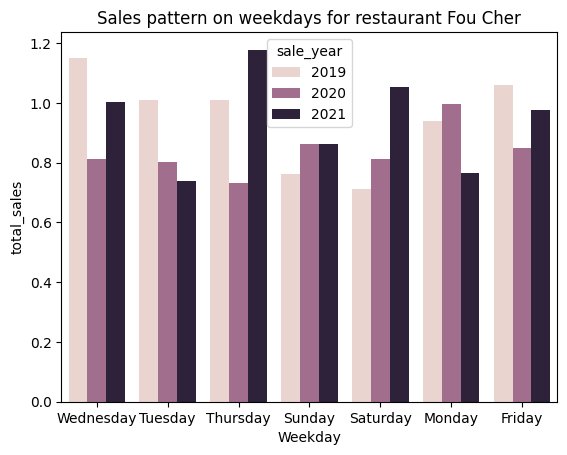

In [540]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==4].groupby(['weekday','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','weekday'],ascending=False)
sns.barplot(x='weekday', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Weekday')
plt.title('Sales pattern on weekdays for restaurant Fou Cher')
plt.show()

**Observation:**


*   The sale figures have improved in 2021 for Friday and Saturday.
*   The sale figues have also improved significantly for wednesday and thursday in 2021



***Let's check the monthly sale pattern of restaurant Fou Cher***

In [541]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==4].groupby('month')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by='sum',ascending=False)

,sum,mean,max,min
month,,,,
October,2852.04,1.095253,107.96,0.0
January,2843.70,1.092051,107.96,0.0
May,2782.85,1.068683,107.96,0.0
November,2462.75,0.977282,107.96,0.0
December,2431.03,0.933575,107.96,0.0
March,2417.40,0.928341,107.96,0.0
April,2342.80,0.929683,107.96,0.0
June,2212.31,0.877901,107.96,0.0
September,2008.27,0.796933,53.98,0.0


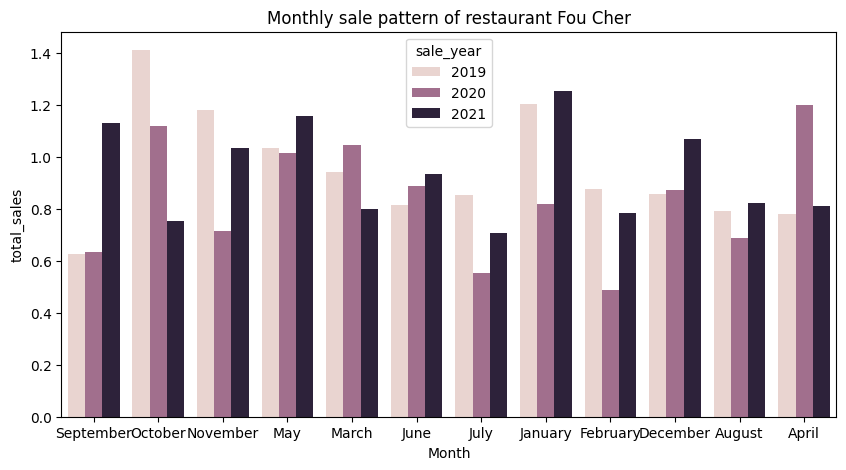

In [542]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==4].groupby(['month','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','month'],ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Month')
plt.title('Monthly sale pattern of restaurant Fou Cher')
plt.show()

**Observation:**


*   The sale figures for the months of september, November, December and January have show significant growth in sales for year 2021.
*   The overall trend shows growth accross all months except October, March and April.

*   The months of october and April show a sharp decline in the sales figure compared to previous year.





In [543]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==4].groupby('sale_year')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by='sum',ascending=False)

,sum,mean,max,min
sale_year,,,,
2019,9698.80,0.949002,107.96,0.0
2021,9595.70,0.938914,107.96,0.0
2020,8590.87,0.838297,107.96,0.0


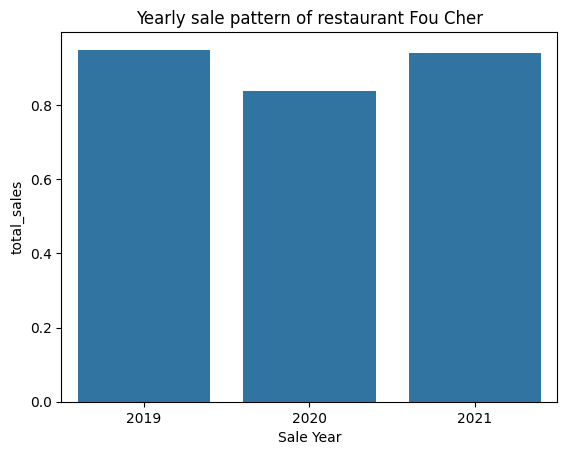

In [544]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==4].groupby(by=['sale_year'])['total_sales'].mean()
grouped_data_df=pd.DataFrame(grouped_data)
type(grouped_data_df)
sns.barplot(x='sale_year', y='total_sales', data=grouped_data_df)
plt.xlabel('Sale Year')
plt.title('Yearly sale pattern of restaurant Fou Cher')
plt.show()

**Observation:**

*   The yearly sale pattern show increase in sales compared to previos year.



**Let's check the sale pattern of resturant Corner Cafe**

***Let's check the sale pattern across weekdays for restaurant Corner Cafe***

In [545]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==5].groupby('weekday')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by=['sum'],ascending=False)

,sum,mean,max,min
weekday,,,,
Tuesday,2487.38,0.660133,52.08,0.0
Friday,2460.83,0.653087,52.74,0.0
Sunday,2426.59,0.648128,52.74,0.0
Monday,2395.01,0.639693,52.74,0.0
Thursday,2343.02,0.621821,37.56,0.0
Saturday,2317.59,0.619014,37.32,0.0
Wednesday,2121.01,0.562901,78.12,0.0


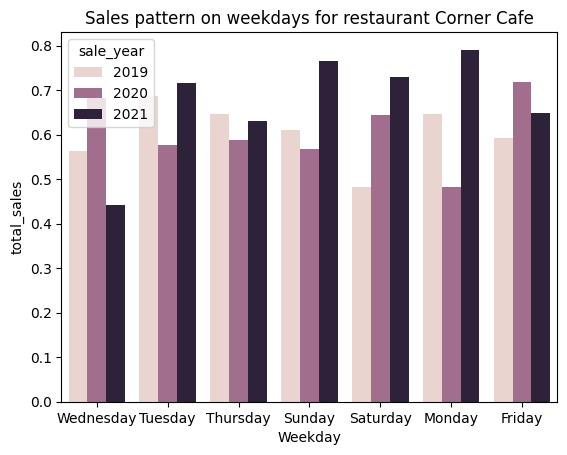

In [546]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==5].groupby(['weekday','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','weekday'],ascending=False)
sns.barplot(x='weekday', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Weekday')
plt.title('Sales pattern on weekdays for restaurant Corner Cafe')
plt.show()

**Observation:**

*   The highest sales are recorded from friday to tuesday in year 2021. So the weekends and weekstart days are good for this restaurant in terms of sale.
*   The lowest sale was recorded on wenesdays.





***Let's check the sale pattern across various months for restaurant Corner Cafe***

***Let's check the monthly sale pattern of restaurant Corner Cafe***

In [547]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==5].groupby('month')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by='sum',ascending=False)

,sum,mean,max,min
month,,,,
June,1545.99,0.715736,26.37,0.0
August,1524.04,0.682814,31.38,0.0
October,1516.36,0.679373,52.74,0.0
November,1448.43,0.670569,78.12,0.0
September,1445.54,0.669231,31.38,0.0
April,1394.36,0.645537,31.38,0.0
May,1370.26,0.613916,26.37,0.0
December,1354.65,0.606922,52.74,0.0
March,1335.54,0.598360,31.38,0.0


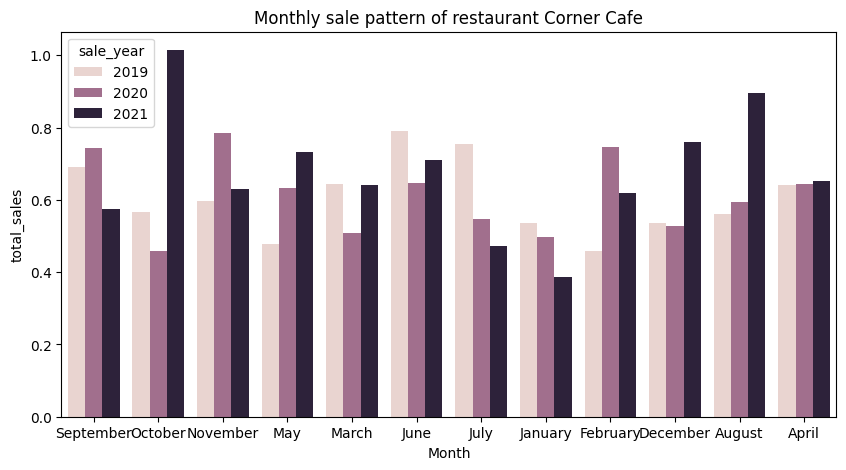

In [548]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==5].groupby(['month','sale_year'])['total_sales'].mean().reset_index().sort_values(by=['sale_year','month'],ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='total_sales', hue='sale_year', data=grouped_data)
plt.xlabel('Month')
plt.title('Monthly sale pattern of restaurant Corner Cafe')
plt.show()

***Let's check the yearly sale pattern of restaurant Corner Cafe***

In [549]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==5].groupby('sale_year')['total_sales'].agg(['sum', 'mean', 'max','min']).sort_values(by='sum',ascending=False)

,sum,mean,max,min
sale_year,,,,
2021,5910.79,0.674748,52.74,0.0
2020,5347.71,0.608801,52.74,0.0
2019,5292.93,0.604216,78.12,0.0


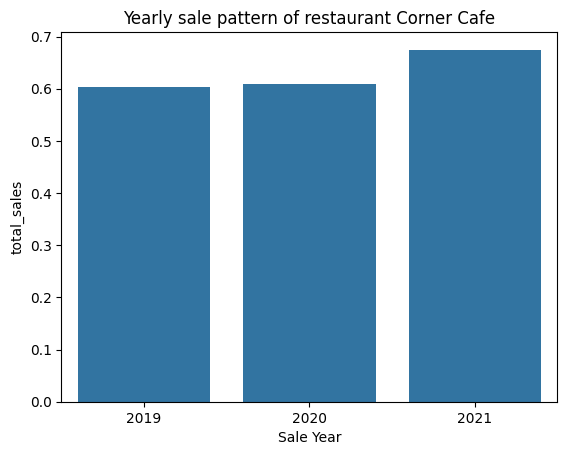

In [550]:
grouped_data = sales_items_resturants_df[sales_items_resturants_df['store_id']==5].groupby(by=['sale_year'])['total_sales'].mean()
grouped_data_df=pd.DataFrame(grouped_data)
type(grouped_data_df)
sns.barplot(x='sale_year', y='total_sales', data=grouped_data_df)
plt.xlabel('Sale Year')
plt.title('Yearly sale pattern of restaurant Corner Cafe')
plt.show()

**Observation:**

*   The year 2021 recorded significant growth as compared to previous years.



**Let us identify the most popular item overall**

In [551]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44,1,Tuesday,January,1,2019
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24,1,Tuesday,January,1,2019
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09,1,Tuesday,January,1,2019
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16,1,Tuesday,January,1,2019
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56,1,Tuesday,January,1,2019


In [552]:
sales_items_resturants_df.groupby('item_id')['item_count'].agg(['sum', 'mean', 'max','min']).sort_values(by='sum',ascending=False)

,sum,mean,max,min
item_id,,,,
19,236337.0,215.635949,570.0,42.0
16,102990.0,93.968978,367.0,0.0
76,61043.0,55.696168,122.0,11.0
38,52772.0,48.149635,206.0,0.0
9,43874.0,40.031022,195.0,0.0
...,...,...,...,...
40,0.0,0.000000,0.0,0.0
86,0.0,0.000000,0.0,0.0
83,0.0,0.000000,0.0,0.0


**Observation:**
Top Five popular Items are -

**Item ID**  **Item Name**<br/>
19       Strawberry Smoothy<br/>
16       Frozen Milky Smoothy<br/>
76       Amazing pork lunch<br/>
38       Mutton Dinner<br/>
9        Orange Juice<br/>

In [553]:
sales_items_resturants_df.groupby(by=['sale_year','item_id'])['item_count'].sum().sort_values(ascending=False)

sale_year  item_id
2021       19         91810.0
2020       19         81455.0
2019       16         69541.0
           19         63072.0
2021       38         38730.0
                       ...   
2020       47             0.0
2019       53             0.0
2021       72             0.0
           43             0.0
2019       1              0.0
Name: item_count, Length: 300, dtype: float64

In [554]:
res_df=sales_items_resturants_df.groupby('item_id')['item_count'].agg(['sum','mean','max','min']).sort_values(by='sum',ascending=False)

In [555]:
res_df.head(5)

,sum,mean,max,min
item_id,,,,
19,236337.0,215.635949,570.0,42.0
16,102990.0,93.968978,367.0,0.0
76,61043.0,55.696168,122.0,11.0
38,52772.0,48.149635,206.0,0.0
9,43874.0,40.031022,195.0,0.0


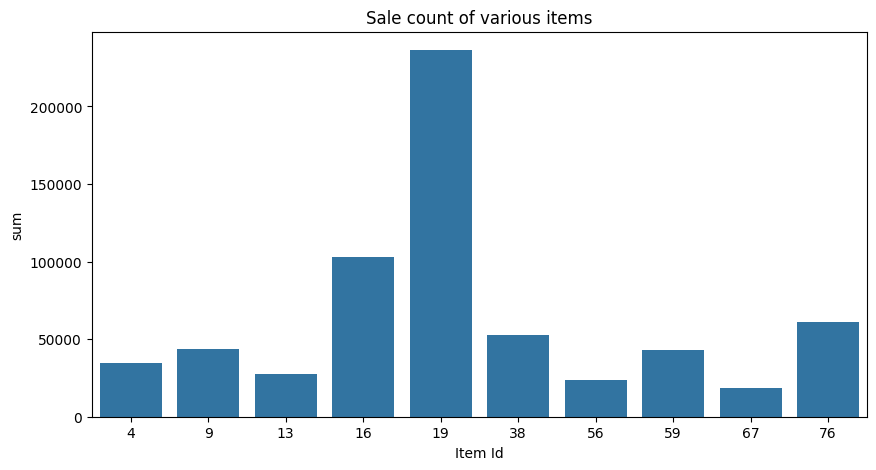

In [556]:
grouped_data = res_df.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='item_id', y='sum', data=grouped_data)
plt.xlabel('Item Id')
plt.title('Sale count of various items')
plt.show()

In [557]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==19].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
5,2019-01-01,19,2.89,108.0,1,Strawberry Smoothy,145,Bob's Diner,312.12,1,Tuesday,January,1,2019


**Observation:**

*   The most popular item is Strawberry Smoothy	(item_id=19)



In [558]:
sales_items_resturants_df[sales_items_resturants_df['item_name']=='Strawberry Smoothy'].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
5,2019-01-01,19,2.89,108.0,1,Strawberry Smoothy,145,Bob's Diner,312.12,1,Tuesday,January,1,2019


In [559]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==19].store_name.unique()

array(["Bob's Diner"], dtype=object)

In [560]:
sales_items_resturants_df[sales_items_resturants_df['item_name']=='Strawberry Smoothy'].store_name.unique()

array(["Bob's Diner"], dtype=object)

**Observation:**
The Strawberry Smoothy is available exclusively at Bob's Diner restaurant.

In [561]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==16].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56,1,Tuesday,January,1,2019


In [562]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==16].store_name.unique()

array(["Bob's Diner"], dtype=object)

**Observation:**
The second most popular item is Frozen Milky Smoothy which is again exclusively available only at Bob's Diner.

In [563]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==76].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
17,2019-01-01,76,17.93,32.0,1,Amazing pork lunch,679,Bob's Diner,573.76,1,Tuesday,January,1,2019


In [564]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==76].store_name.unique()

array(["Bob's Diner"], dtype=object)

**Observation:**
The Third most popular item is Amazing pork lunch which is again exclusively available only at Bob's Diner.

In [565]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==38].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
48,2019-01-01,38,10.8,0.0,1,Mutton Dinner,542,Bob's Diner,0.0,1,Tuesday,January,1,2019


In [566]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==38].store_name.unique()

array(["Bob's Diner"], dtype=object)

In [567]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==9].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
27,2019-01-01,9,3.91,0.0,1,Orange Juice,135,Bob's Diner,0.0,1,Tuesday,January,1,2019


In [568]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==9].store_name.unique()

array(["Bob's Diner"], dtype=object)

**Observation:**
The Fourth and Fifth most popular items are Mutton Dinner and Orange Juice. Both these items again are exclusive products of Bob's Diner.

**Let us find the most popular item of each store**

In [569]:
sales_items_resturants_df.groupby(by=['store_id','item_id'])['item_count'].agg(['sum']).sort_values(by=['store_id','sum'],ascending=False)

sum
store_id item_id       
6        89       997.0
         64       165.0
         88       157.0
         27       135.0
         14        91.0
...                 ...
1        68       846.0
         44       275.0
         31       211.0
         24       204.0
         37       118.0

[100 rows x 1 columns]

In [570]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==1].groupby(by=['store_id','item_id'])['item_count'].agg(['sum', 'mean', 'max','min']).sort_values(by=['store_id','sum'],ascending=False).head(1)

,,sum,mean,max,min
store_id,item_id,,,,
1,19,236337.0,215.635949,570.0,42.0


In [571]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==2].groupby(by=['store_id','item_id'])['item_count'].agg(['sum', 'mean', 'max','min']).sort_values(by=['store_id','sum'],ascending=False).head(1)

,,sum,mean,max,min
store_id,item_id,,,,
2,42,1147.0,1.046533,5.0,0.0


In [572]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==3].groupby(by=['store_id','item_id'])['item_count'].agg(['sum', 'mean', 'max','min']).sort_values(by=['store_id','sum'],ascending=False).head(1)

,,sum,mean,max,min
store_id,item_id,,,,
3,49,1692.0,1.543796,6.0,0.0


In [573]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==4].groupby(by=['store_id','item_id'])['item_count'].agg(['sum', 'mean', 'max','min']).sort_values(by=['store_id','sum'],ascending=False).head(1)

,,sum,mean,max,min
store_id,item_id,,,,
4,80,298.0,0.271898,2.0,0.0


In [574]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==5].groupby(by=['store_id','item_id'])['item_count'].agg(['sum', 'mean', 'max','min']).sort_values(by=['store_id','sum'],ascending=False).head(1)

,,sum,mean,max,min
store_id,item_id,,,,
5,71,273.0,0.249088,3.0,0.0


In [575]:
sales_items_resturants_df[sales_items_resturants_df['store_id']==6].groupby(by=['store_id','item_id'])['item_count'].agg(['sum', 'mean', 'max','min']).sort_values(by=['store_id','sum'],ascending=False).head(1)

,,sum,mean,max,min
store_id,item_id,,,,
6,89,997.0,0.909672,6.0,0.0


In [576]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==19].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
5,2019-01-01,19,2.89,108.0,1,Strawberry Smoothy,145,Bob's Diner,312.12,1,Tuesday,January,1,2019


In [577]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==42].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
10,2019-01-01,42,2.91,1.0,2,Fantastic Milky Smoothy,318,Beachfront Bar,2.91,1,Tuesday,January,1,2019


In [578]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==49].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
57,2019-01-01,49,1.39,0.0,3,Awesome Smoothy,78,Sweet Shack,0.0,1,Tuesday,January,1,2019


In [579]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==80].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
82,2019-01-01,80,53.98,0.0,4,Blue Ribbon Fruity Vegi Lunch,881,Fou Cher,0.0,1,Tuesday,January,1,2019


In [580]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==71].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
76,2019-01-01,71,3.98,0.0,5,Frozen Milky Smoothy,211,Corner Cafe,0.0,1,Tuesday,January,1,2019


In [581]:
sales_items_resturants_df[sales_items_resturants_df['item_id']==89].head(1)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
91,2019-01-01,89,3.06,0.0,6,Awesome Soft Drink,248,Surfs Up,0.0,1,Tuesday,January,1,2019


**Observation:**

The most popular item of each store is listed below -

**Store Name => Item Item Name**<br/>

**Bob's Diner** => Strawberry Smoothy <br/>
**Beachfront Bar** => Fantastic Milky Smoothy	<br/>
**Sweet Shack** => Awesome Smoothy	<br/>
**Fou Cher** =>Blue Ribbon Fruity Vegi Lunch<br/>
**Corner Cafe** => Frozen Milky Smoothy<br/>
**Surfs Up** => Awesome Soft Drink


**Now, let us find the sales volume of each store**

In [582]:
sales_items_resturants_df.groupby('store_name')['item_count'].agg(['sum']).sort_values(by=['sum'],ascending=False)

,sum
store_name,
Bob's Diner,687527.0
Surfs Up,1803.0
Sweet Shack,1736.0
Corner Cafe,1310.0
Beachfront Bar,1305.0
Fou Cher,1106.0


**Observation:**
Bob's Diner has the highest sales volume in terms of number of items sold.

**Let us check the sale amount**

In [583]:
sales_items_resturants_df.groupby('store_name')['total_sales'].agg(['sum']).sort_values(by=['sum'],ascending=False)

,sum
store_name,
Bob's Diner,6337275.69
Fou Cher,27885.37
Corner Cafe,16551.43
Surfs Up,15651.49
Beachfront Bar,3796.20
Sweet Shack,2578.27


In [584]:
sales_items_resturants_df.groupby('store_name')['total_sales'].agg(['mean']).sort_values(by=['mean'],ascending=False)

,mean
store_name,
Bob's Diner,240.924410
Surfs Up,1.428056
Fou Cher,0.908673
Corner Cafe,0.629236
Beachfront Bar,0.577281
Sweet Shack,0.294055


**Observation:**
Bob's Diner is also the highest revenue generator among all the restaurants.

**Let us find the most expensive Item in each store**

In [585]:
sales_items_resturants_df.groupby('store_name')['price'].agg(['max']).sort_values(by=['max'],ascending=False)

,max
store_name,
Fou Cher,53.98
Bob's Diner,29.22
Corner Cafe,26.37
Surfs Up,26.21
Sweet Shack,7.70
Beachfront Bar,5.70


In [586]:
sales_items_resturants_df[sales_items_resturants_df['price']==53.98].head(3)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
82,2019-01-01,80,53.98,0.0,4,Blue Ribbon Fruity Vegi Lunch,881,Fou Cher,0.00,1,Tuesday,January,1,2019
115,2019-01-02,80,53.98,2.0,4,Blue Ribbon Fruity Vegi Lunch,881,Fou Cher,107.96,2,Wednesday,January,1,2019
216,2019-01-03,80,53.98,2.0,4,Blue Ribbon Fruity Vegi Lunch,881,Fou Cher,107.96,3,Thursday,January,1,2019


In [587]:
sales_items_resturants_df[sales_items_resturants_df['price']==29.22].head(3)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44,1,Tuesday,January,1,2019
122,2019-01-02,3,29.22,0.0,1,Sweet Fruity Cake,931,Bob's Diner,0.00,2,Wednesday,January,1,2019
221,2019-01-03,3,29.22,0.0,1,Sweet Fruity Cake,931,Bob's Diner,0.00,3,Thursday,January,1,2019


In [588]:
sales_items_resturants_df[sales_items_resturants_df['price']==26.37].head(3)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
58,2019-01-01,50,26.37,0.0,5,Pike Lunch,653,Corner Cafe,0.0,1,Tuesday,January,1,2019
159,2019-01-02,50,26.37,0.0,5,Pike Lunch,653,Corner Cafe,0.0,2,Wednesday,January,1,2019
257,2019-01-03,50,26.37,0.0,5,Pike Lunch,653,Corner Cafe,0.0,3,Thursday,January,1,2019


In [589]:
sales_items_resturants_df[sales_items_resturants_df['price']==26.21].head(3)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
8,2019-01-01,27,26.21,1.0,6,Steak Meal,607,Surfs Up,26.21,1,Tuesday,January,1,2019
139,2019-01-02,27,26.21,0.0,6,Steak Meal,607,Surfs Up,0.00,2,Wednesday,January,1,2019
237,2019-01-03,27,26.21,0.0,6,Steak Meal,607,Surfs Up,0.00,3,Thursday,January,1,2019


In [590]:
sales_items_resturants_df[sales_items_resturants_df['price']==7.70].head(3)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
79,2019-01-01,77,7.7,0.0,3,Blue Ribbon Frozen Milky Cake,636,Sweet Shack,0.0,1,Tuesday,January,1,2019
181,2019-01-02,77,7.7,0.0,3,Blue Ribbon Frozen Milky Cake,636,Sweet Shack,0.0,2,Wednesday,January,1,2019
279,2019-01-03,77,7.7,0.0,3,Blue Ribbon Frozen Milky Cake,636,Sweet Shack,0.0,3,Thursday,January,1,2019


In [591]:
sales_items_resturants_df[sales_items_resturants_df['price']==5.70].head(3)

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
68,2019-01-01,62,5.7,0.0,2,Sweet Vegi Soft Drink,538,Beachfront Bar,0.0,1,Tuesday,January,1,2019
169,2019-01-02,62,5.7,0.0,2,Sweet Vegi Soft Drink,538,Beachfront Bar,0.0,2,Wednesday,January,1,2019
267,2019-01-03,62,5.7,0.0,2,Sweet Vegi Soft Drink,538,Beachfront Bar,0.0,3,Thursday,January,1,2019


**Observation:**
Given below is the list of most expensive item of each store along with its calorie count.
<table>
<thead><th>Store</th><th>Item Name</th><th>Price</th><th>KCaal</th></thead>
<tr><td>Fou Cher</td><td>Blue Ribbon Fruity Vegi Lunch</td><td>53.98</td><td>881</td></tr>
<tr><td>Bob's Diner</td><td>Sweet Fruity Cake</td><td>29.22</td><td>931</td></tr>
<tr><td>Corner Cafe</td><td>Pike Lunch</td><td>26.37</td><td>653</td></tr>
<tr><td>Surfs Up</td><td>Steak Meal</td><td>26.21</td><td>607</td></tr>
<tr><td>Sweet Shack</td><td>Blue Ribbon Frozen Milky Cake</td><td>7.7</td><td>636</td></tr>
<tr><td>Beachfront Bar</td><td>Sweet Vegi Soft Drink</td><td>5.7</td><td>538</td></tr>
</table>

**Forecasting using Machine Learning Model**

In [592]:
sales_items_resturants_df.head()

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,total_sales,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,58.44,1,Tuesday,January,1,2019
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24,1,Tuesday,January,1,2019
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,34.09,1,Tuesday,January,1,2019
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16,1,Tuesday,January,1,2019
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,436.56,1,Tuesday,January,1,2019


In [593]:
sales_items_resturants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          109600 non-null  datetime64[ns]
 1   item_id       109600 non-null  int64         
 2   price         109600 non-null  float64       
 3   item_count    109600 non-null  float64       
 4   store_id      109600 non-null  int64         
 5   item_name     109600 non-null  category      
 6   kcal          109600 non-null  int64         
 7   store_name    109600 non-null  object        
 8   total_sales   109600 non-null  float64       
 9   day_in_month  109600 non-null  int32         
 10  weekday       109600 non-null  object        
 11  month         109600 non-null  object        
 12  quarter       109600 non-null  int32         
 13  sale_year     109600 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(3), int32(3), int64(3), o

**Let us Check the outliers**

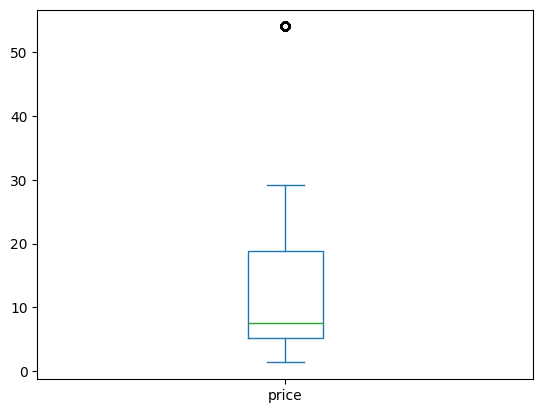

In [594]:
sales_items_resturants_df['price'].plot(kind='box',subplots=True)
plt.show()

**Observation:**There are no substantial outliers in price data.

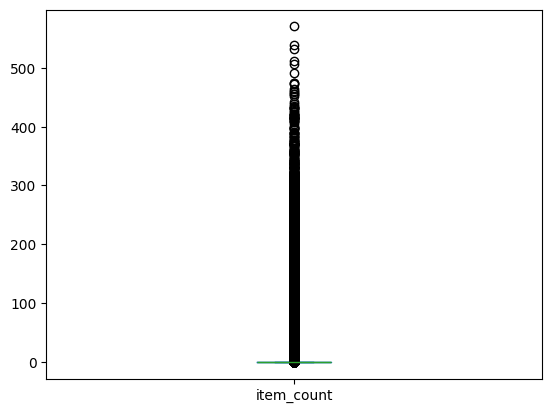

In [595]:
sales_items_resturants_df['item_count'].plot(kind='box',subplots=True)
plt.show()

In [596]:
sales_items_resturants_df['item_count'].isnull().sum()

0

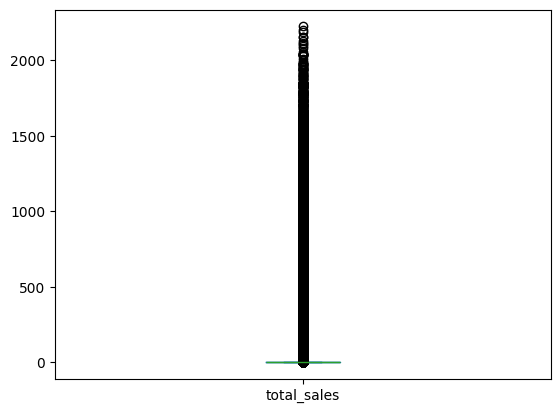

In [597]:
sales_items_resturants_df['total_sales'].plot(kind='box',subplots=True)
plt.show()

In [598]:
sales_items_resturants_df.describe()

,date,item_id,price,item_count,store_id,kcal,total_sales,day_in_month,quarter,sale_year
count,109600,109600.000000,109600.000000,109600.000000,109600.00000,109600.000000,109600.000000,109600.000000,109600.000000,109600.000000
mean,2020-07-01 12:00:00,50.500000,11.763700,6.339297,3.52000,536.730000,58.428271,15.732664,2.508212,2020.000000
min,2019-01-01 00:00:00,1.000000,1.390000,0.000000,1.00000,78.000000,0.000000,1.000000,1.000000,2019.000000
25%,2019-10-01 18:00:00,25.750000,5.280000,0.000000,2.00000,406.250000,0.000000,8.000000,2.000000,2019.000000
50%,2020-07-01 12:00:00,50.500000,7.625000,0.000000,4.00000,572.500000,0.000000,16.000000,3.000000,2020.000000
75%,2021-04-01 06:00:00,75.250000,18.790000,0.000000,5.00000,638.250000,0.000000,23.000000,4.000000,2021.000000
max,2021-12-31 00:00:00,100.000000,53.980000,570.000000,6.00000,1023.000000,2224.800000,31.000000,4.000000,2021.000000
std,NaN,28.866202,8.946225,30.003728,1.69989,201.200165,214.812200,8.801410,1.117193,0.816128


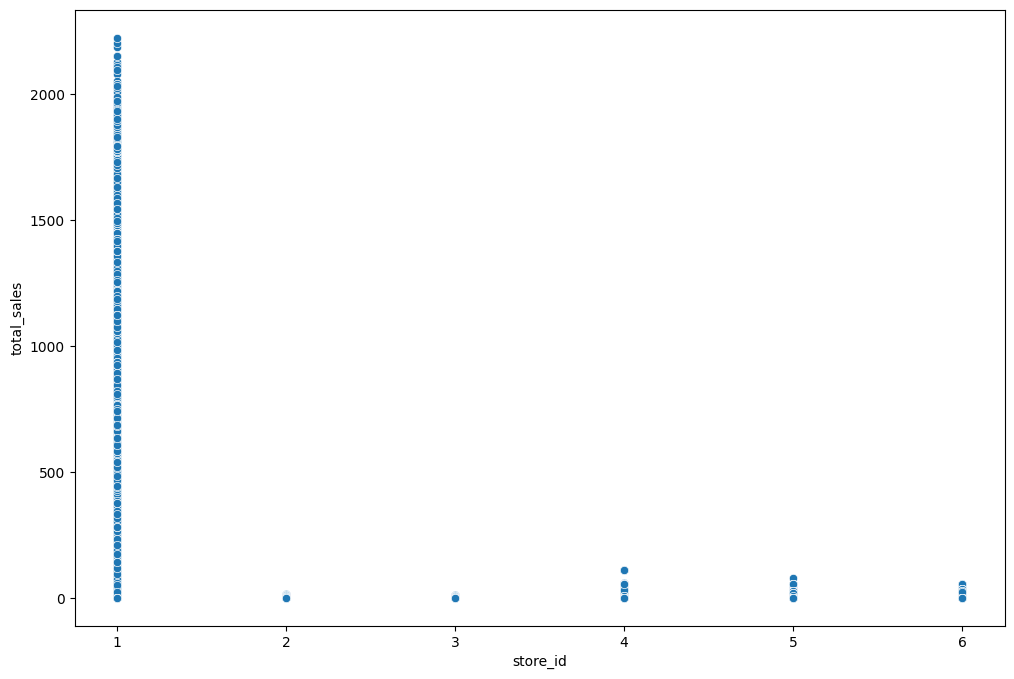

In [599]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=sales_items_resturants_df,x="store_id",y="total_sales",legend=True)
#plt.axhline(color='r',y=0.12,linestyle='--')
plt.show()

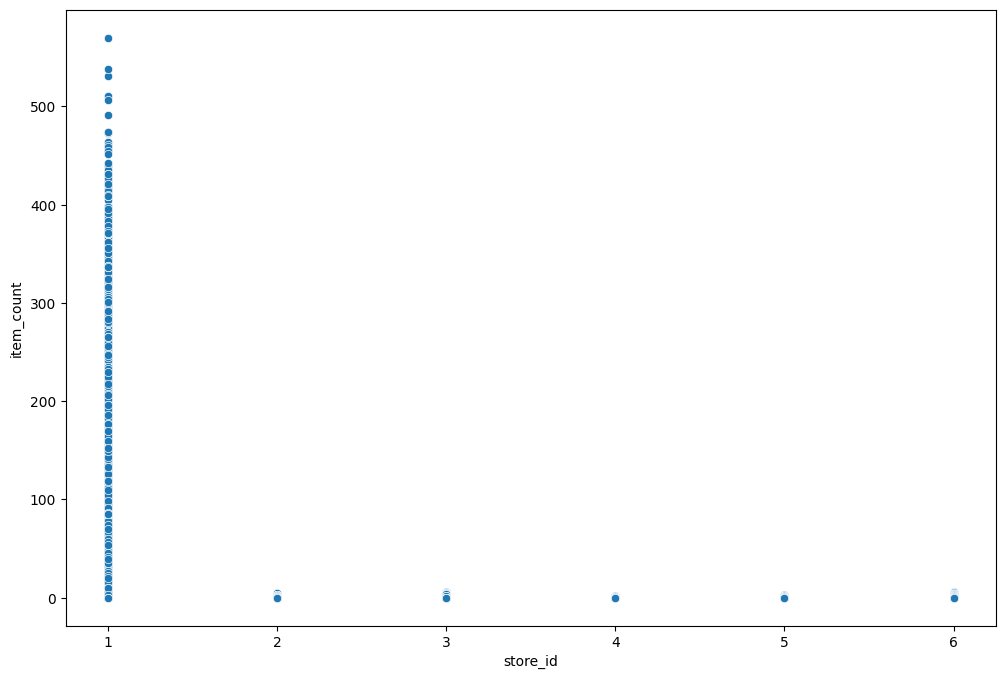

In [600]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=sales_items_resturants_df,x="store_id",y="item_count",legend=True)
#plt.axhline(color='r',y=0.12,linestyle='--')
plt.show()

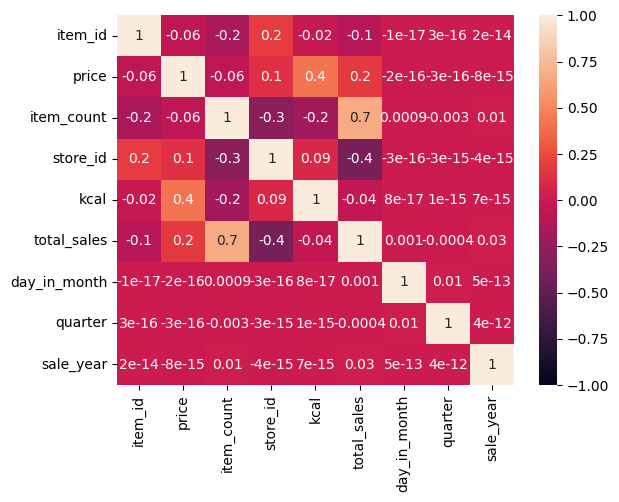

In [603]:
sns.heatmap(sales_items_resturants_df.corr(numeric_only=True),annot=True,vmin=-1,fmt=".1g")
plt.show()

**Let us drop the column item_name and store_name as their numeric IDs are already present in the dataset.**

In [67]:
sales_items_resturants_df.drop(columns=['item_name','store_name'],inplace=True)

In [68]:
sales_items_resturants_df.head(2)

,date,item_id,price,item_count,store_id,kcal,total_sales,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,931,58.44,1,Tuesday,January,1,2019
1,2019-01-01,4,26.42,22.0,1,763,581.24,1,Tuesday,January,1,2019


**Let us enocde the categorical values of weekday and Month to numeric**

In [69]:
sales_items_resturants_df.replace({'weekday':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},inplace=True)

<ipython-input-69-14ef7837c41b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales_items_resturants_df.replace({'weekday':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},inplace=True)


In [70]:
sales_items_resturants_df.head(2)

,date,item_id,price,item_count,store_id,kcal,total_sales,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,931,58.44,1,2,January,1,2019
1,2019-01-01,4,26.42,22.0,1,763,581.24,1,2,January,1,2019


In [71]:
sales_items_resturants_df.replace({'month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}},inplace=True)

<ipython-input-71-4f0895754e2a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales_items_resturants_df.replace({'month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}},inplace=True)


In [72]:
sales_items_resturants_df.head(2)

,date,item_id,price,item_count,store_id,kcal,total_sales,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,931,58.44,1,2,1,1,2019
1,2019-01-01,4,26.42,22.0,1,763,581.24,1,2,1,1,2019


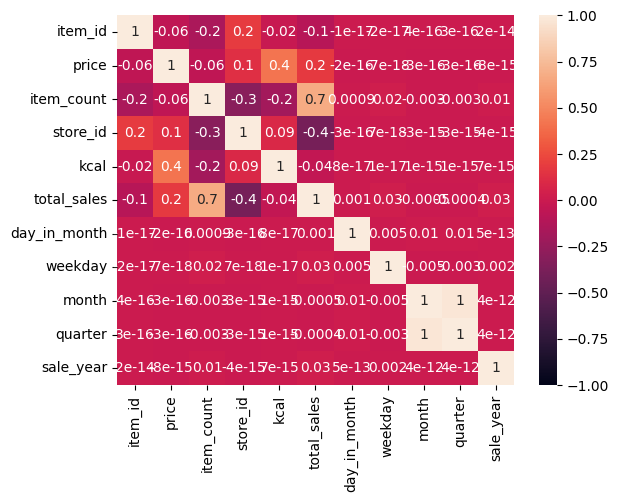

<Figure size 2000x1000 with 0 Axes>

In [73]:
sns.heatmap(sales_items_resturants_df.corr(numeric_only=True),annot=True,vmin=-1,fmt=".1g")
plt.figure(figsize=(20,10))
plt.show()

In [74]:
Y=sales_items_resturants_df['total_sales']
X=sales_items_resturants_df.drop(columns=['total_sales'])

In [75]:
X.head()

,date,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,931,1,2,1,1,2019
1,2019-01-01,4,26.42,22.0,1,763,1,2,1,1,2019
2,2019-01-01,12,4.87,7.0,1,478,1,2,1,1,2019
3,2019-01-01,13,4.18,12.0,1,490,1,2,1,1,2019
4,2019-01-01,16,3.21,136.0,1,284,1,2,1,1,2019


In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          109600 non-null  datetime64[ns]
 1   item_id       109600 non-null  int64         
 2   price         109600 non-null  float64       
 3   item_count    109600 non-null  float64       
 4   store_id      109600 non-null  int64         
 5   kcal          109600 non-null  int64         
 6   day_in_month  109600 non-null  int32         
 7   weekday       109600 non-null  int64         
 8   month         109600 non-null  int64         
 9   quarter       109600 non-null  int32         
 10  sale_year     109600 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(5)
memory usage: 7.9 MB


In [77]:
Y.head()

,total_sales
0,58.44
1,581.24
2,34.09
3,50.16
4,436.56


In [78]:
X_Test=X[X['date']>='01-Jul-2021']

In [79]:
X_Test.head()

,date,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
91200,2021-07-01,4,26.42,53.0,1,763,1,4,7,3,2021
91201,2021-07-01,9,3.91,136.0,1,135,1,4,7,3,2021
91202,2021-07-01,11,19.48,1.0,4,787,1,4,7,3,2021
91203,2021-07-01,12,4.87,6.0,1,478,1,4,7,3,2021
91204,2021-07-01,13,4.18,63.0,1,490,1,4,7,3,2021


In [80]:
X_Test.shape

(18400, 11)

In [81]:
Y_Test=Y[X['date']>='01-Jul-2021']

In [82]:
Y_Test.head()

,total_sales
91200,1400.26
91201,531.76
91202,19.48
91203,29.22
91204,263.34


In [83]:
Y_Test.shape

(18400,)

In [84]:
X_Train=X[X['date']<'01-Jul-2021']
Y_Train=Y[X['date']<'01-Jul-2021']

In [85]:
X_Train.head()

,date,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,931,1,2,1,1,2019
1,2019-01-01,4,26.42,22.0,1,763,1,2,1,1,2019
2,2019-01-01,12,4.87,7.0,1,478,1,2,1,1,2019
3,2019-01-01,13,4.18,12.0,1,490,1,2,1,1,2019
4,2019-01-01,16,3.21,136.0,1,284,1,2,1,1,2019


In [86]:
X_Train.tail()

,date,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
91195,2021-06-30,96,21.93,0.0,5,708,30,3,6,2,2021
91196,2021-06-30,97,28.65,0.0,4,744,30,3,6,2,2021
91197,2021-06-30,98,5.00,0.0,2,579,30,3,6,2,2021
91198,2021-06-30,99,5.32,0.0,4,423,30,3,6,2,2021
91199,2021-06-30,100,2.48,0.0,2,223,30,3,6,2,2021


In [87]:
X_Train['sale_year'].unique()

array([2019, 2020, 2021], dtype=int32)

In [88]:
X_Train.shape

(91200, 11)

In [89]:
Y_Train.head()

,total_sales
0,58.44
1,581.24
2,34.09
3,50.16
4,436.56


In [90]:
Y_Train.shape

(91200,)

**Let us drop column date from Train and Test datasets as we have created new features like day_in_month,month,sale_year**

In [91]:
X_Train.drop(columns=['date'],inplace=True)

<ipython-input-91-deefb324d55a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Train.drop(columns=['date'],inplace=True)


In [92]:
X_Train.head(3)

,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
0,3,29.22,2.0,1,931,1,2,1,1,2019
1,4,26.42,22.0,1,763,1,2,1,1,2019
2,12,4.87,7.0,1,478,1,2,1,1,2019


In [93]:
X_Train.shape

(91200, 10)

In [94]:
X_Test.drop(columns=['date'],inplace=True)

<ipython-input-94-537d2a58b53c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Test.drop(columns=['date'],inplace=True)


In [95]:
X_Test.head(3)

,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
91200,4,26.42,53.0,1,763,1,4,7,3,2021
91201,9,3.91,136.0,1,135,1,4,7,3,2021
91202,11,19.48,1.0,4,787,1,4,7,3,2021


In [96]:
X_Test.shape

(18400, 10)

**SCALING**

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
mms=MinMaxScaler()

In [99]:
X_Train_mms=pd.DataFrame(mms.fit_transform(X_Train))

In [100]:
X_Train_mms.head()

,0,1,2,3,4,5,6,7,8,9
0,0.020202,0.529188,0.003509,0.0,0.902646,0.0,0.166667,0.0,0.0,0.0
1,0.030303,0.475946,0.038596,0.0,0.724868,0.0,0.166667,0.0,0.0,0.0
2,0.111111,0.066172,0.012281,0.0,0.423280,0.0,0.166667,0.0,0.0,0.0
3,0.121212,0.053052,0.021053,0.0,0.435979,0.0,0.166667,0.0,0.0,0.0
4,0.151515,0.034607,0.238596,0.0,0.217989,0.0,0.166667,0.0,0.0,0.0


In [101]:
X_Test_mms=pd.DataFrame(mms.transform(X_Test))

In [102]:
X_Test_mms.head()

,0,1,2,3,4,5,6,7,8,9
0,0.030303,0.475946,0.092982,0.0,0.724868,0.0,0.5,0.545455,0.666667,1.0
1,0.080808,0.047918,0.238596,0.0,0.060317,0.0,0.5,0.545455,0.666667,1.0
2,0.101010,0.343982,0.001754,0.6,0.750265,0.0,0.5,0.545455,0.666667,1.0
3,0.111111,0.066172,0.010526,0.0,0.423280,0.0,0.5,0.545455,0.666667,1.0
4,0.121212,0.053052,0.110526,0.0,0.435979,0.0,0.5,0.545455,0.666667,1.0


**Putting column names on the scaled dataframe**

In [103]:
X_Train.columns

Index(['item_id', 'price', 'item_count', 'store_id', 'kcal', 'day_in_month',
       'weekday', 'month', 'quarter', 'sale_year'],
      dtype='object')

In [104]:
X_Train_mms.columns=X_Train.columns

In [105]:
X_Train_mms.head(2)

,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
0,0.020202,0.529188,0.003509,0.0,0.902646,0.0,0.166667,0.0,0.0,0.0
1,0.030303,0.475946,0.038596,0.0,0.724868,0.0,0.166667,0.0,0.0,0.0


In [106]:
X_Test.columns

Index(['item_id', 'price', 'item_count', 'store_id', 'kcal', 'day_in_month',
       'weekday', 'month', 'quarter', 'sale_year'],
      dtype='object')

In [107]:
X_Test_mms.columns=X_Test.columns

In [108]:
X_Test_mms.head(2)

,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
0,0.030303,0.475946,0.092982,0.0,0.724868,0.0,0.5,0.545455,0.666667,1.0
1,0.080808,0.047918,0.238596,0.0,0.060317,0.0,0.5,0.545455,0.666667,1.0


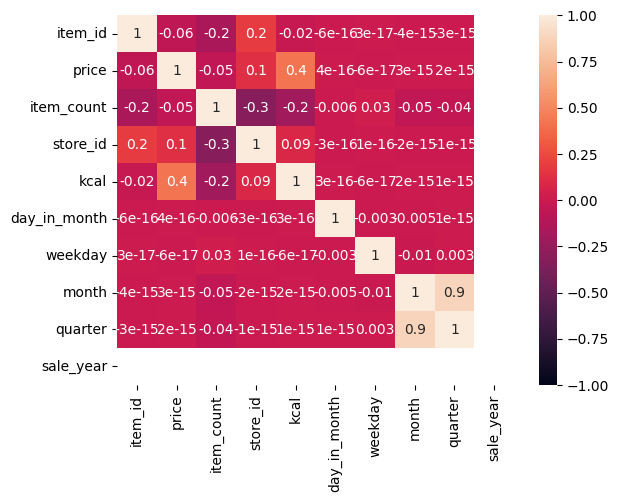

<Figure size 1000x400 with 0 Axes>

In [646]:
sns.heatmap(X_Test_mms.corr(numeric_only=True),annot=True,vmin=-1,fmt=".1g")
plt.figure(figsize=(10,4))
plt.show()

**Linear Regression**

In [647]:
from sklearn.linear_model import LinearRegression

In [648]:
lr=LinearRegression()

In [649]:
lr.fit(X_Train_mms,Y_Train)

LinearRegression()

In [650]:
lr.score(X_Train_mms,Y_Train)

0.5464525541840407

In [651]:
lr.score(X_Test_mms,Y_Test)

0.5593781113295502

In [652]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_Test, lr.predict(X_Test_mms))
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2)
r2 = r2_score(Y_Test, lr.predict(X_Test_mms))
print(f"R-squared: {r2}")

Mean Squared Error: 24827.66638971657
R-squared: 0.5593781113295502


**Let us calculate Root Mean Squared Error Value for Linear Regresion Model**

In [653]:
from sklearn.metrics import root_mean_squared_error

In [654]:
rmse=root_mean_squared_error(Y_Test,lr.predict(X_Test_mms))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 157.56797387069673


**Random Forest**

In [655]:
from sklearn.ensemble import RandomForestRegressor

In [656]:
rf=RandomForestRegressor()

In [659]:
rf.fit(X_Train_mms,Y_Train)

RandomForestRegressor()

In [660]:
rf.score(X_Train_mms,Y_Train)

0.9999844692738701

In [661]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_Test, rf.predict(X_Test_mms))
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2)
r2 = r2_score(Y_Test, rf.predict(X_Test_mms))
print(f"R-squared: {r2}")

Mean Squared Error: 21.815709110256414
R-squared: 0.9996128319593166


**Let us calculate the Root Mean Squared Value**

In [662]:
from sklearn.metrics import root_mean_squared_error

In [663]:
rmse=root_mean_squared_error(Y_Test,rf.predict(X_Test_mms))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 4.670728969899282


In [664]:
result=rf.predict(X_Test_mms).round(2)

In [665]:
result

array([1400.26,  530.39,   19.48, ...,    0.  ,    0.  ,    0.  ])

In [667]:
len(result)

18400

In [666]:
Y_Test.shape

(18400,)

**XGBoost**

In [668]:
from xgboost import XGBRegressor

In [669]:
xgb=XGBRegressor()

In [670]:
xgb.fit(X_Train_mms,Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [671]:
xgb.score(X_Train_mms,Y_Train)

0.9998992825910982

In [672]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_Test, xgb.predict(X_Test_mms))
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2)
r2 = r2_score(Y_Test, xgb.predict(X_Test_mms))
print(f"R-squared: {r2}")

Mean Squared Error: 52.87787830760788
R-squared: 0.9990615650201247


**Let us calculate the Root Mean Squared Error value for XGBoost model**

In [673]:
from sklearn.metrics import root_mean_squared_error

In [674]:
rmse=root_mean_squared_error(Y_Test,xgb.predict(X_Test_mms))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 7.27171769993912


**Observation:**
From the values of Root Squared and Root Mean Squared Error values we conclude that the Random Forest Model is best performing model.

In [675]:
cnt=0
for i in range(len(X_Test_mms)):
    print(f"Predicted_val={result[i].round(0)},Actual_val={Y_Test.iloc[i].round(0)}")
    if result[i].round(0)!=Y_Test.iloc[i].round(0):
        cnt+=1
print("Total Deviation count=",cnt)
per=(cnt/len(X_Test_mms))*100
print("Deviation percentage=",per)

Streaming output truncated to the last 5000 lines.
Predicted_val=364.0,Actual_val=364.0
Predicted_val=19.0,Actual_val=19.0
Predicted_val=150.0,Actual_val=150.0
Predicted_val=356.0,Actual_val=414.0
Predicted_val=863.0,Actual_val=864.0
Predicted_val=395.0,Actual_val=395.0
Predicted_val=6.0,Actual_val=6.0
Predicted_val=6.0,Actual_val=6.0
Predicted_val=1148.0,Actual_val=1134.0
Predicted_val=3.0,Actual_val=3.0
Predicted_val=70.0,Actual_val=70.0
Predicted_val=546.0,Actual_val=546.0
Predicted_val=1052.0,Actual_val=1052.0
Predicted_val=16.0,Actual_val=16.0
Predicted_val=28.0,Actual_val=28.0
Predicted_val=17.0,Actual_val=17.0
Predicted_val=52.0,Actual_val=52.0
Predicted_val=1437.0,Actual_val=1488.0
Predicted_val=9.0,Actual_val=9.0
Predicted_val=15.0,Actual_val=15.0
Predicted_val=29.0,Actual_val=29.0
Predicted_val=0.0,Actual_val=0.0
Predicted_val=0.0,Actual_val=0.0
Predicted_val=0.0,Actual_val=0.0
Predicted_val=0.0,Actual_val=0.0
Predicted_val=0.0,Actual_val=0.0
Predicted_val=0.0,Actual_val=0.0


**Let us predict for next 12 months**

In [676]:
X_last_yr=X[X['date']>='01-Jan-2021']

In [677]:
X_last_yr['sale_year']=X_last_yr['sale_year'] + 1

<ipython-input-677-ddefdc20c255>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_last_yr['sale_year']=X_last_yr['sale_year'] + 1


In [678]:
X_Nxt_yr=X_last_yr

In [679]:
X_Nxt_yr.drop(columns=['date'],inplace=True)

<ipython-input-679-18851c3ca12e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Nxt_yr.drop(columns=['date'],inplace=True)


In [680]:
X_Nxt_yr.head()

,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
73100,3,29.22,3.0,1,931,1,5,1,1,2022
73101,4,26.42,39.0,1,763,1,5,1,1,2022
73102,9,3.91,89.0,1,135,1,5,1,1,2022
73103,12,4.87,3.0,1,478,1,5,1,1,2022
73104,13,4.18,37.0,1,490,1,5,1,1,2022


In [681]:
X_Nxt_yr_mms=pd.DataFrame(mms.transform(X_Nxt_yr))

In [682]:
nxt_yr_prediction=rf.predict(X_Nxt_yr_mms)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [683]:
nxt_yr_prediction

array([  87.66  , 1030.38  ,  348.0682, ...,    0.    ,    0.    ,
          0.    ])

**Deep Learning Model**

In [109]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [685]:
tf.__version__

'2.17.1'

**Let us a callback instance for early stopping. The model training will stop earlier than 100 epochs if 5 consecutive accuracy values match. The start from epoch value 50 will ensure that the model will atleast be trained for 50 times before early stopping.**

In [110]:
callback=EarlyStopping(monitor='val_loss',patience=5,start_from_epoch=100)

In [687]:
#create sequential model
model=models.Sequential()

In [688]:
X_Train_mms.shape

(91200, 10)

In [689]:
X_Train_mms.shape[0]

91200

In [696]:
#Add LSTM Input layer
model.add(LSTM(64,return_sequences=True, activation='relu', input_shape=(X_Train_mms.shape[0], 1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [697]:
# Output layer
model.add(Dense(units=1,activation='linear'))

In [698]:
model.layers

[<LSTM name=lstm_9, built=True>,
 <LSTM name=lstm_10, built=True>,
 <LSTM name=lstm_11, built=True>,
 <LSTM name=lstm_12, built=True>,
 <LSTM name=lstm_13, built=True>,
 <Dense name=dense_3, built=True>]

In [699]:
# Compiling the model
## loss as per regression
model.compile(optimizer="adam",loss="mse",metrics=['mse'])

In [700]:
# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [117]:
data_X_train=X_Train_mms.values
data_X_train.shape, type(data_X_train)

((91200, 10), numpy.ndarray)

In [118]:
data_X_test=X_Test_mms.values
data_X_test.shape, type(data_X_test)

((18400, 10), numpy.ndarray)

In [119]:
data_Y_train=Y_Train.values
data_Y_train.shape, type(data_Y_train)

((91200,), numpy.ndarray)

In [120]:
data_Y_test=Y_Test.values
data_Y_test.shape, type(data_Y_test)

((18400,), numpy.ndarray)

In [121]:
# Reshape data for LSTM
data_X_train = data_X_train.reshape((data_X_train.shape[0], data_X_train.shape[1], 1))
data_X_test = data_X_test.reshape((data_X_test.shape[0], data_X_test.shape[1], 1))


**Let us train the model**

In [706]:
# Train the model
history = model.fit(data_X_train, data_Y_train, epochs=150, validation_data=(data_X_test, data_Y_test),callbacks=callback)

Epoch 1/150
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 46028.8047 - mse: 46028.8047 - val_loss: 56429.8906 - val_mse: 56429.8906
Epoch 2/150
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - loss: 43990.7148 - mse: 43990.7148 - val_loss: 56417.2383 - val_mse: 56417.2383
Epoch 3/150
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 43553.3008 - mse: 43553.3008 - val_loss: 56419.4727 - val_mse: 56419.4727
Epoch 4/150
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 45191.6016 - mse: 45191.6016 - val_loss: 56696.7266 - val_mse: 56696.7266
Epoch 5/150
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 43110.2344 - mse: 43110.2344 - val_loss: 51454.4648 - val_mse: 51454.4648
Epoch 6/150
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 77s 27ms/step - loss: 38150.3320 - mse: 38150.3320 - val_loss: 38207.3242 - val_mse: 38207.3242
Epoch 7/150
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 27463.9258 - mse: 27463.9258 - val_loss: 30492.2305 - val_mse: 30492.2305
Epoch 8/150
2850/2850 ━━━━━

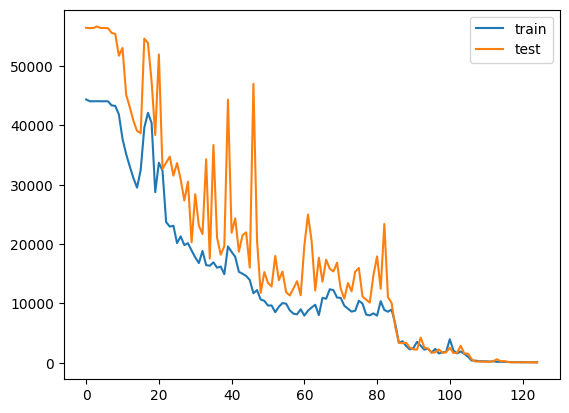

In [701]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [707]:
model.evaluate(data_X_train,data_Y_train)

2850/2850 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - loss: 18.8033 - mse: 18.8033


[18.880434036254883, 18.880434036254883]

In [708]:
model.evaluate(data_X_test,data_Y_test)

575/575 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 23.0397 - mse: 23.0397


[24.180553436279297, 24.180553436279297]

In [709]:
model.weights

[<KerasVariable shape=(1, 256), dtype=float32, path=sequential_3/lstm_9/lstm_cell/kernel>,
 <KerasVariable shape=(64, 256), dtype=float32, path=sequential_3/lstm_9/lstm_cell/recurrent_kernel>,
 <KerasVariable shape=(256,), dtype=float32, path=sequential_3/lstm_9/lstm_cell/bias>,
 <KerasVariable shape=(64, 256), dtype=float32, path=sequential_3/lstm_10/lstm_cell/kernel>,
 <KerasVariable shape=(64, 256), dtype=float32, path=sequential_3/lstm_10/lstm_cell/recurrent_kernel>,
 <KerasVariable shape=(256,), dtype=float32, path=sequential_3/lstm_10/lstm_cell/bias>,
 <KerasVariable shape=(64, 256), dtype=float32, path=sequential_3/lstm_11/lstm_cell/kernel>,
 <KerasVariable shape=(64, 256), dtype=float32, path=sequential_3/lstm_11/lstm_cell/recurrent_kernel>,
 <KerasVariable shape=(256,), dtype=float32, path=sequential_3/lstm_11/lstm_cell/bias>,
 <KerasVariable shape=(64, 256), dtype=float32, path=sequential_3/lstm_12/lstm_cell/kernel>,
 <KerasVariable shape=(64, 256), dtype=float32, path=sequen

In [710]:
predicted_val=model.predict(data_X_test)

575/575 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


In [711]:
predicted_val

array([[1.4039465e+03],
       [5.3754913e+02],
       [8.4098434e-01],
       ...,
       [1.4726067e-01],
       [3.4872818e-01],
       [3.5717964e-01]], dtype=float32)

In [712]:
cnt=0

for i in range(len(data_X_test)):
    print(f"Predicted_val={np.abs(predicted_val[i].round(0))},Actual_val={Y_Test.iloc[i].round(0)}")
    if np.abs(predicted_val[i].round(0))!=Y_Test.iloc[i].round(0):
        cnt+=1
print("Total Deviation count=",cnt)
per=(cnt/len(data_X_test))*100
print("Deviation percentage=",per)

Streaming output truncated to the last 5000 lines.
Predicted_val=[365.],Actual_val=364.0
Predicted_val=[21.],Actual_val=19.0
Predicted_val=[152.],Actual_val=150.0
Predicted_val=[378.],Actual_val=414.0
Predicted_val=[869.],Actual_val=864.0
Predicted_val=[395.],Actual_val=395.0
Predicted_val=[8.],Actual_val=6.0
Predicted_val=[5.],Actual_val=6.0
Predicted_val=[1138.],Actual_val=1134.0
Predicted_val=[6.],Actual_val=3.0
Predicted_val=[72.],Actual_val=70.0
Predicted_val=[553.],Actual_val=546.0
Predicted_val=[1054.],Actual_val=1052.0
Predicted_val=[3.],Actual_val=16.0
Predicted_val=[30.],Actual_val=28.0
Predicted_val=[18.],Actual_val=17.0
Predicted_val=[54.],Actual_val=52.0
Predicted_val=[1481.],Actual_val=1488.0
Predicted_val=[8.],Actual_val=9.0
Predicted_val=[19.],Actual_val=15.0
Predicted_val=[6.],Actual_val=29.0
Predicted_val=[0.],Actual_val=0.0
Predicted_val=[0.],Actual_val=0.0
Predicted_val=[0.],Actual_val=0.0
Predicted_val=[0.],Actual_val=0.0
Predicted_val=[0.],Actual_val=0.0
Predicted

In [714]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(data_Y_test, predicted_val)*100
print(mape)

188.82826944081677


**Observation:**
Since there are too many zero values MAPE is not very useful because there would be a division by zero or values of MAPE tending to infinity.

**Let us create another model and train it with complete data series**

In [111]:
model2=models.Sequential()

In [112]:
#Add LSTM Input layer
model2.add(LSTM(64,return_sequences=True, activation='relu', input_shape=(X_Train_mms.shape[0], 1)))
model2.add(LSTM(64, return_sequences=True))
model2.add(LSTM(64, return_sequences=True))
model2.add(LSTM(64, return_sequences=True))
model2.add(LSTM(64, return_sequences=True))
model2.add(LSTM(64, return_sequences=True))
model2.add(LSTM(64))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
# Output layer
model2.add(layers.Dense(units=1,activation='linear'))

In [114]:
# Compiling the model
## loss as per regression
model2.compile(optimizer="adam",loss="mse",metrics=['mse'])

In [122]:
type(data_X_train)

numpy.ndarray

In [123]:
data_X_train.shape

(91200, 10, 1)

In [124]:
data_X_train

array([[[0.02020202],
        [0.52918806],
        [0.00350877],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.03030303],
        [0.475946  ],
        [0.03859649],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.11111111],
        [0.06617228],
        [0.0122807 ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.97979798],
        [0.06864423],
        [0.        ],
        ...,
        [0.45454545],
        [0.33333333],
        [1.        ]],

       [[0.98989899],
        [0.07472904],
        [0.        ],
        ...,
        [0.45454545],
        [0.33333333],
        [1.        ]],

       [[1.        ],
        [0.02072637],
        [0.        ],
        ...,
        [0.45454545],
        [0.33333333],
        [1.        ]]])

In [125]:
data_X_test.shape

(18400, 10, 1)

In [126]:
data_X=np.concatenate((data_X_train,data_X_test),axis=0)

In [127]:
data_X.shape

(109600, 10, 1)

In [128]:
data_Y=np.concatenate((data_Y_train,data_Y_test),axis=0)

In [129]:
data_Y.shape

(109600,)

In [130]:
history2 = model2.fit(data_X, data_Y, epochs=100, validation_data=(data_X_test, data_Y_test))

Epoch 1/100
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 155s 43ms/step - loss: 47257.7148 - mse: 47257.7148 - val_loss: 56396.5117 - val_mse: 56396.5117
Epoch 2/100
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 214s 46ms/step - loss: 46773.6367 - mse: 46773.6367 - val_loss: 56386.1875 - val_mse: 56386.1875
Epoch 3/100
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 196s 44ms/step - loss: 45482.0195 - mse: 45482.0195 - val_loss: 56439.1094 - val_mse: 56439.1094
Epoch 4/100
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 152s 44ms/step - loss: 45689.3047 - mse: 45689.3047 - val_loss: 56504.8164 - val_mse: 56504.8164
Epoch 5/100
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 203s 45ms/step - loss: 47091.3008 - mse: 47091.3008 - val_loss: 56380.9375 - val_mse: 56380.9375
Epoch 6/100
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 204s 45ms/step - loss: 46483.6680 - mse: 46483.6680 - val_loss: 56379.9883 - val_mse: 56379.9883
Epoch 7/100
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 196s 44ms/step - loss: 45099.0898 - mse: 45099.0898 - val_loss: 56355.5039 - val_mse: 56355.5039
Epoch 8/100
3425/342

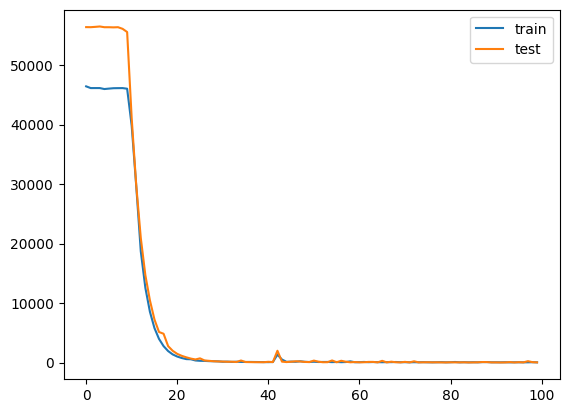

In [132]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

**Let us predict for next 3 months**

In [133]:
X

,date,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,931,1,2,1,1,2019
1,2019-01-01,4,26.42,22.0,1,763,1,2,1,1,2019
2,2019-01-01,12,4.87,7.0,1,478,1,2,1,1,2019
3,2019-01-01,13,4.18,12.0,1,490,1,2,1,1,2019
4,2019-01-01,16,3.21,136.0,1,284,1,2,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,5,708,31,5,12,4,2021
109596,2021-12-31,97,28.65,0.0,4,744,31,5,12,4,2021
109597,2021-12-31,98,5.00,0.0,2,579,31,5,12,4,2021
109598,2021-12-31,99,5.32,0.0,4,423,31,5,12,4,2021


In [134]:
X_last_3_months=X
X_last_3_months

,date,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
0,2019-01-01,3,29.22,2.0,1,931,1,2,1,1,2019
1,2019-01-01,4,26.42,22.0,1,763,1,2,1,1,2019
2,2019-01-01,12,4.87,7.0,1,478,1,2,1,1,2019
3,2019-01-01,13,4.18,12.0,1,490,1,2,1,1,2019
4,2019-01-01,16,3.21,136.0,1,284,1,2,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,5,708,31,5,12,4,2021
109596,2021-12-31,97,28.65,0.0,4,744,31,5,12,4,2021
109597,2021-12-31,98,5.00,0.0,2,579,31,5,12,4,2021
109598,2021-12-31,99,5.32,0.0,4,423,31,5,12,4,2021


In [135]:
X_last_3_months = X_last_3_months[(X_last_3_months['date'] >= '01-Jan-2021') & (X_last_3_months['date'] <= '31-Mar-2021')]
X_last_3_months

,date,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
73100,2021-01-01,3,29.22,3.0,1,931,1,5,1,1,2021
73101,2021-01-01,4,26.42,39.0,1,763,1,5,1,1,2021
73102,2021-01-01,9,3.91,89.0,1,135,1,5,1,1,2021
73103,2021-01-01,12,4.87,3.0,1,478,1,5,1,1,2021
73104,2021-01-01,13,4.18,37.0,1,490,1,5,1,1,2021
...,...,...,...,...,...,...,...,...,...,...,...
82095,2021-03-31,96,21.93,0.0,5,708,31,3,3,1,2021
82096,2021-03-31,97,28.65,0.0,4,744,31,3,3,1,2021
82097,2021-03-31,98,5.00,0.0,2,579,31,3,3,1,2021
82098,2021-03-31,99,5.32,0.0,4,423,31,3,3,1,2021


In [136]:
X_last_3_months['sale_year']=X_last_3_months['sale_year']+1

<ipython-input-136-0fa1b32822fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_last_3_months['sale_year']=X_last_3_months['sale_year']+1


In [137]:
X_last_3_months.drop(columns=['date'],inplace=True)

<ipython-input-137-159541ae2ca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_last_3_months.drop(columns=['date'],inplace=True)


In [138]:
X_last_3_months

,item_id,price,item_count,store_id,kcal,day_in_month,weekday,month,quarter,sale_year
73100,3,29.22,3.0,1,931,1,5,1,1,2022
73101,4,26.42,39.0,1,763,1,5,1,1,2022
73102,9,3.91,89.0,1,135,1,5,1,1,2022
73103,12,4.87,3.0,1,478,1,5,1,1,2022
73104,13,4.18,37.0,1,490,1,5,1,1,2022
...,...,...,...,...,...,...,...,...,...,...
82095,96,21.93,0.0,5,708,31,3,3,1,2022
82096,97,28.65,0.0,4,744,31,3,3,1,2022
82097,98,5.00,0.0,2,579,31,3,3,1,2022
82098,99,5.32,0.0,4,423,31,3,3,1,2022


In [139]:
X_Nxt_3_months_mms=pd.DataFrame(mms.transform(X_last_3_months))
X_Nxt_3_months_mms.head()

,0,1,2,3,4,5,6,7,8,9
0,0.020202,0.529188,0.005263,0.0,0.902646,0.0,0.666667,0.0,0.0,1.5
1,0.030303,0.475946,0.068421,0.0,0.724868,0.0,0.666667,0.0,0.0,1.5
2,0.080808,0.047918,0.156140,0.0,0.060317,0.0,0.666667,0.0,0.0,1.5
3,0.111111,0.066172,0.005263,0.0,0.423280,0.0,0.666667,0.0,0.0,1.5
4,0.121212,0.053052,0.064912,0.0,0.435979,0.0,0.666667,0.0,0.0,1.5


In [142]:
pre_val=model2.predict(X_Nxt_3_months_mms)

282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step


In [143]:
pre_val

array([[ 8.4251488e+01],
       [ 1.0304608e+03],
       [ 3.4678387e+02],
       ...,
       [-5.4168701e-03],
       [-2.3632050e-02],
       [-3.7373352e-01]], dtype=float32)